In [2]:
# TOMÁS SEZARO
# TP DE CLASIFICACIÓN utilizando los algoritmos de Clasificación y técnicas vistos.
# Utilizando los algoritmos de Clasificación y técnicas vistos, elegí tomar como dataset para este trabajo práctico a los Pokémon y realizar mi análisis en función a sus diferentes atributos y características.
# Los Pokémon y los datos que estos tienen son información que tienen un valor y significado muy importante para mí. 
# Representan una parte de mi infancia y adolescencia muy valerosa que me acompaño durante muchísimos años. Tengo un amplio conocimiento sobre esta temática y me entusiasma mucho hacer este análisis ya que jugaba sus videojuegos, veía sus películas y series e intercambiaba sus cartas.
# Por esta razón decidí que mi trabajo sea en base a un dataset de Pokémon. 
# Existen diversas clases de criaturas en el mundo Pokémon, las hay de diferentes tamaños, poderes y colores. Están dotados de fuerzas y habilidades, listos para las batallas y con diferentes atributos de poderes y características.

In [3]:
# Regresión Logística - Clasificación

# A diferencia de la regresión lineal donde se predice un valor continuo, se utiliza la regresión logística se utiliza para predecir una variable categórica binaria o multiclase.
# En lugar de predecir valores numéricos como en la regresión lineal, la regresión logística estima la probabilidad de que una instancia pertenezca a una determinada clase. 
# Esto se logra utilizando una función logística, también conocida como función sigmoide, que transforma una combinación lineal de las variables de entrada en un valor comprendido entre 0 y 1.

In [4]:
# Importo las librerias que me brinda Python.

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score,\
 recall_score, f1_score, roc_auc_score, classification_report
import warnings

In [5]:
# Realizo la importación de los datos.
# Ignoro las advertencias generadas por el módulo warnings en Python.

warnings.filterwarnings("ignore")
df = pd.read_csv('pokemonResistance.csv', low_memory=False)
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Winbattle,Resistance
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,35,450
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,50,730
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,75,940
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,86,1110
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,40,500


In [6]:
# Para este analisis tomaré los valores de Total y Resistance para la variable X independiente.
# Y los valores de Legendary para la variable Y dependiente.

In [7]:
# Consulto si hay algún valor null (NaN), me devolverá un booleano que en caso de ser true es porque si hay valores Nan.

df.isnull().values.any()

True

In [8]:
# Averiguo en que columnas hay valores null.

df.isnull().any()

#             False
Name          False
Type 1        False
Type 2         True
Total         False
HP            False
Attack        False
Defense       False
Sp. Atk       False
Sp. Def       False
Speed         False
Generation    False
Legendary     False
Winbattle     False
Resistance    False
dtype: bool

In [9]:
# Constato que únicamente hay valores null en la columna Type2, por lo que no hay inconvenientes en tomar los datos de Total, Resistence y Legendary.

In [10]:
# Coloco los datos de las columnas Total y Resistance en la variable X.
# Coloco los datos de la columna Legendary en la variable y.

X = df.iloc[:, [4,14]].values 
y = df.iloc[:, 12].values
X,y

(array([[ 318,  450],
        [ 405,  730],
        [ 525,  940],
        ...,
        [ 600, 1095],
        [ 680, 1135],
        [ 600, 1030]], dtype=int64),
 array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, Fa

In [11]:
# Utilizo LabelEnconder para convertir a números los datos categóricos de la columna Legendary almacenados en la variable y.

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y = y_encoded 
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [12]:
# Imprimo nuevamente mis variables con sus datos.

X,y

(array([[ 318,  450],
        [ 405,  730],
        [ 525,  940],
        ...,
        [ 600, 1095],
        [ 680, 1135],
        [ 600, 1030]], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 

In [13]:
# Utilizo train_test_split para dividir un dataset en bloques. 
# Conjunto de testing por un lado y conjunto de entrenamiento por el otro.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [14]:
# Escalo los datos (variables)
# El escalado va a transformar los valores de las características de forma que estén confinados en un rango [a, b], típicamente [0, 1] o [-1, 1].

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [15]:
# Ajusto el modelo de clasificación con el conjunto de entrenamiento.
# Esto se hace para hacer predicciones en los datos de prueba y mostrar una tabla que compara las etiquetas reales con las etiquetas predichas para una muestra de prueba limitada.

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
pd.DataFrame({'Actual': y_test, 'Predicción': y_pred}).head(100)

,Actual,Predicción
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
95,0,1
96,0,0
97,1,0
98,0,0


In [16]:
# Construyo la matriz de confusión, la cual es una técnica muy potente. 
# Se calcula sobre el conjunto de testing y se puede observar si las predicciones que ha realizado el algoritmo son potentes

cm = confusion_matrix(y_test, y_pred)
cm

array([[176,   6],
       [ 11,   7]], dtype=int64)

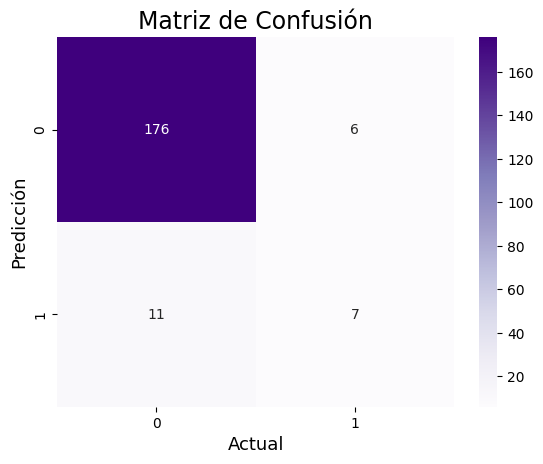

In [17]:
# Visualizo la matriz de confusión de un modelo de clasificación utilizando la biblioteca Seaborn y Matplotlib en Python.
# La matriz de confusión habla de qué tan bien ha evaluado el algoritmo la clasificación, en este caso, de los pokemones legendarios o no legendarios con respecto
# a las propiedades de Total y Resitence.

sns.heatmap(cm,
 annot=True,
 fmt='g',
 cmap='Purples')
plt.ylabel('Predicción',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Matriz de Confusión',fontsize=17)
plt.show()

In [18]:
# Las predicciones correctas son los valores numericos que se encuentran en el cuadrado superior a la izquierda junto con las que se encuentran en el cuadrado inferior a la derecha.
# Mientras que las predicciones incorrectas son los valores numericos que se encuentran en el cuadrado superior a la derecha junto con las que se encuentran en el cuadrado inferior a la izquierda.

In [19]:
# OBESERVACIÓN

# El cuadrado superior izquierdo con un valor de 176 representa la cantidad de instancias clasificadas correctamente como clase 0.
# El cuadrado superior derecho con un valor de 6 representa la cantidad de instancias clasificadas incorrectamente como clase 1 cuando en realidad son de clase 0.
# El cuadrado inferior izquierdo con un valor de 11 representa la cantidad de instancias clasificadas incorrectamente como clase 0 cuando en realidad son de clase 1.
# El cuadrado inferior derecho con un valor de 7 representa la cantidad de instancias clasificadas correctamente como clase 1.

# Noto que hay un gran numero de predicciones calificadas como correctas, 183 aplicando la suma de los valores correctos, a diferencia de los 17 casos incorrectos.
# Además en el caso de el cuadrado superior izquierdo, clase 0, que son las predicciones correctas, presenta un color purpura intenso a diferencia de los demás. 
# Esto podriamos considerarlo como un buen primer indicio del modelo.

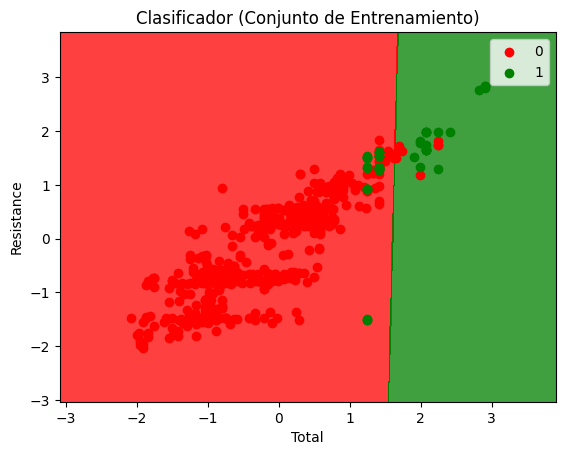

In [20]:
# Visualización del modelo de clasificación en el conjunto de Entrenamiento.

from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
 np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
 alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
 plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
 color = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Clasificador (Conjunto de Entrenamiento)')
plt.xlabel('Total')
plt.ylabel('Resistance')
plt.legend()
plt.show()

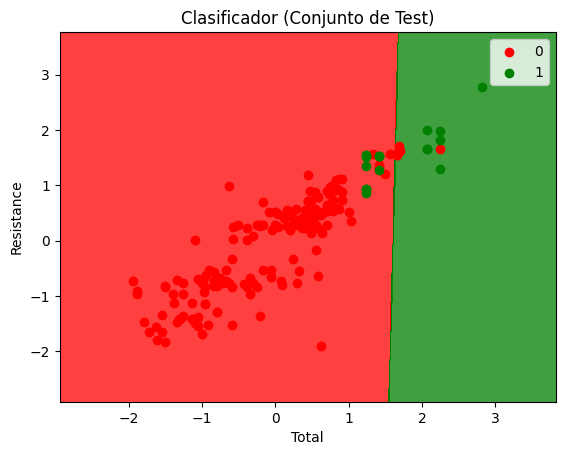

In [21]:
# Visualización del modelo de clasificación en el conjunto de Test.

X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
 np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
 alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
 plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
 color = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Clasificador (Conjunto de Test)')
plt.xlabel('Total')
plt.ylabel('Resistance')
plt.legend()
plt.show()

In [22]:
# Ahora analizaré diferentes métricas de evaluación del rendimiento de un modelo de clasificación.
# Precisión del modelo: La precisión mide la proporción de instancias positivas que fueron correctamente clasificadas como positivas.
# Exactitud del modelo: La exactitud es la proporción total de predicciones correctas realizadas por el modelo. 
# Sensibilidad del modelo: La sensibilidad, también conocida como tasa de verdaderos positivos o recall, mide la proporción de instancias positivas que fueron correctamente identificadas por el modelo.
# Puntaje F1 del modelo: El puntaje F1 es una medida que combina la precisión y la sensibilidad en un solo valor. Es útil cuando se busca un equilibrio entre la precisión y la sensibilidad.
# Curva ROC - AUC del modelo: La curva ROC, y el área bajo la curva (AUC) son métricas utilizadas para evaluar el rendimiento de un modelo de clasificación en problemas de clasificación binaria. La curva ROC representa la relación entre la tasa de verdaderos positivos y la tasa de falsos positivos para diferentes umbrales de clasificación. El AUC mide la capacidad del modelo para distinguir entre las clases. 

In [23]:
print(f'Precisión del modelo: {precision_score(y_test, y_pred):.2f}')
print(f'Exactitud del modelo:{accuracy_score(y_test, y_pred):.2f}')
print(f'Sensibilidad del modelo: {recall_score(y_test, y_pred):.2f}')
print(f'Puntaje F1 del modelo:{f1_score(y_test, y_pred):.2f}')
print(f'Curva ROC - AUC del modelo:{roc_auc_score(y_test, y_pred):.2f}')

Precisión del modelo: 0.54
Exactitud del modelo:0.92
Sensibilidad del modelo: 0.39
Puntaje F1 del modelo:0.45
Curva ROC - AUC del modelo:0.68


In [24]:
# Imprimo las métricas de evaluación del modelo proporcionan información adicional sobre el rendimiento del modelo en términos de precisión, exactitud, sensibilidad, puntaje F1 y el área bajo la curva ROC-AUC.

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       182
           1       0.54      0.39      0.45        18

    accuracy                           0.92       200
   macro avg       0.74      0.68      0.70       200
weighted avg       0.90      0.92      0.91       200



In [25]:
# Definiciones de otros datos

# Macro avg: Calcula el promedio sin tener en cuenta el desequilibrio en el número de muestras de cada clase. 
# Para cada métrica, se calcula la media de los valores para todas las clases y se informa como el promedio macro avg.
# Se trata de un promedio no ponderado en el que todas las clases tienen el mismo peso. 
# Este enfoque considera que todas las clases son igualmente importantes y le asigna la misma importancia a cada clase al calcular el promedio.

# Weighted avg: Calcula el promedio ponderado teniendo en cuenta el número de muestras en cada clase. 
# Para cada métrica, se calcula la media ponderada de los valores para todas las clases y se informa como el promedio weighted avg. 
# En este enfoque, se asigna un peso proporcional al número de muestras de cada clase. 
# Las clases con más muestras tienen un impacto mayor en el cálculo del promedio. 
# Este enfoque es útil cuando hay un desequilibrio significativo en el número de muestras entre las clases.


# Para la conclución me centraré en los valores específicos obtenidos de cada clase en lugar de los promedios macro avg y weighted avg. 
# Los valores específicos de cada clase proporcionan información más detallada y relevante sobre cómo el modelo está clasificando cada clase individualmente.
# El enfoque en los valores de cada clase es considerablemente más importante cuando hay un desequilibrio significativo en el número de muestras entre las clases. 
# En estos casos, los promedios pueden verse afectados por la clase dominante y no reflejar adecuadamente el rendimiento del modelo en las clases minoritarias.
# Por lo tanto, los valores específicos de cada clase ofrecen una visión más detallada y proporcionan mayor eficiencia en las conclusiones del rendimiento del modelo de clasificación.

In [26]:
# Conclusión

# Dado los resultados obtenidos con las diferentes metricas e informes puedo sacar las siguientes conclusiones adicionales.
# El modelo tiene una precisión alta para la clase 0 con un 94% lo cual es algo altamente positivo.
# Sin embargo, con respecto a la clase 1 el porcentaje de presición baja considerablemente teniendo apenas un 54% de presición.
# La exactitud o accuracy, es devolvió un porcentaje muy elevado del 92% lo que significa que un muy alto numero de instancias se clasificaron correctamente en general sobre el total de instancias.
# En general, un mayor valor de exactitud o accuracy indica un mejor rendimiento del modelo, pero tambien puede ser engañoso en casos de desequilibrio de clases, donde una clase dominante puede influir en el resultado.
# Por lo tanto es un dato que hay que tomarlo con cierto cuidado.
# Otro aspecto a tener en cuenta es que la sensibilidad con respecto a la clase 0 es del 97%, por lo que el modelo es capaz de identificar de manera confiable la mayoría de las instancias de esa clase.
# Aunque el inconveniente vuelve a surgir en la clase 1, en donde la sensibilidad desciende hasta el valor de 39% lo que es considerablemente bajo.
# El Puntaje F1, que es una medida que combina precisión y sensibilidad para evaluar el equilibrio entre ambas, vuelve arrojar una diferenciación muy marcada, 95% para la clase 0 lo cual es muy bueno, pero 45% para la clase 1 siendo un porcentaje bajo.
# Finalmente el porcentaje arrojado por Curva ROC - AUC del modelo es del 68%, el cual es un valor por arriba del 50% (50% indica un modelo que clasifica las instancias de manera aleatoria), aunque lo esperado sería un valor aun más alto del modelo para separar las clases positivas y negativas y evitando cometer errores.

# Mi conclusión final de este modelo de clasificación de Regresión Logística, para este caso particular, es que posee un rendimiento regular, ya que pese a tener un buen porcentaje de exactitud y que tambien presenta buenos valores para la clase 0, se encuentran inconvenientes cuando tiene que clasificar a la clase 1, dado a los porcentajes obtenidos se concluye que no lo hace de forma eficiente ni confiable.


In [27]:
# K-Nearest Neighbors

# Es un algoritmo de aprendizaje automático supervisado, parte de tener una serie de datos categorizados.
# Para realizar una predicción, se toma una instancia de prueba con características desconocidas y se calcula su similitud con las instancias de entrenamiento.
# Se elige el número K de vecinos que se quiere tener en cuenta para el proceso de clasificación. 
# Una vez elegido se toman los K vecinos más cercanos del nuevo dato utilizando la distancia euclídea. E
# Una vez seleccionados esos K vecinos más cercanos, se cuentan el número de puntos que pertenecen a cada una de las categorías.
# Finalmente, se asigna el punto a la categoría luego de aplicar la regla del voto por mayoría.

In [28]:
# Importo las librerias que me brinda Python.

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score,\
 recall_score, f1_score, roc_auc_score, classification_report
from matplotlib.colors import ListedColormap
import warnings

In [29]:
# Realizo la importación de los datos.
# Ignoro las advertencias generadas por el módulo warnings en Python.


warnings.filterwarnings("ignore")
df = pd.read_csv('pokemonResistance.csv', low_memory=False)
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Winbattle,Resistance
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,35,450
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,50,730
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,75,940
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,86,1110
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,40,500


In [30]:
# Para este analisis tomaré los valores de Total y Resistance para la variable X independiente.
# Y los valores de Legendary para la variable Y dependiente.

In [31]:
# Consulto si hay algún valor null (NaN), me devolverá un booleano que en caso de ser true es porque si hay valores Nan.

df.isnull().values.any()

True

In [32]:
# Averiguo en que columnas hay valores null.

df.isnull().any()

#             False
Name          False
Type 1        False
Type 2         True
Total         False
HP            False
Attack        False
Defense       False
Sp. Atk       False
Sp. Def       False
Speed         False
Generation    False
Legendary     False
Winbattle     False
Resistance    False
dtype: bool

In [33]:
# Constato que únicamente hay valores null en la columna Type2, por lo que no hay inconvenientes en tomar los datos de Total, Resistence y Legendary.

In [34]:
# Coloco los datos de las columnas Total y Resistance en la variable X.
# Coloco los datos de la columna Legendary en la variable y.

X = df.iloc[:, [4,14]].values 
y = df.iloc[:, 12].values
X,y

(array([[ 318,  450],
        [ 405,  730],
        [ 525,  940],
        ...,
        [ 600, 1095],
        [ 680, 1135],
        [ 600, 1030]], dtype=int64),
 array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, Fa

In [35]:
# Utilizo LabelEnconder para convertir a números los datos categóricos de la columna Legendary almacenados en la variable y.

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y = y_encoded 
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [36]:
# Imprimo nuevamente mis variables con sus datos.

X,y

(array([[ 318,  450],
        [ 405,  730],
        [ 525,  940],
        ...,
        [ 600, 1095],
        [ 680, 1135],
        [ 600, 1030]], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 

In [37]:
# Utilizo train_test_split para dividir un dataset en bloques. 
# Conjunto de testing por un lado y conjunto de entrenamiento por el otro.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


In [38]:
# Escalo los datos (variables)
# El escalado va a transformar los valores de las características de forma que estén confinados en un rango [a, b], típicamente [0, 1] o [-1, 1].

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [39]:
# Ajusto el modelo de clasificacion con el conjunto de entrenamiento.
# Esto se hace para hacer predicciones en los datos de prueba y mostrar una tabla que compara las etiquetas reales con las etiquetas predichas para una muestra de prueba limitada.
# p=2 es la Distancia euclidiana 

classifier = KNeighborsClassifier(n_neighbors = 5, metric = "minkowski", p = 2) 
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
pd.DataFrame({'Actual': y_test, 'Predicción': y_pred}).head(100)

,Actual,Predicción
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
95,0,0
96,0,0
97,1,1
98,0,0


In [40]:
# Construyo la matriz de confusión, la cual es una técnica muy potente. 
# Se calcula sobre el conjunto de testing y se puede observar si las predicciones que ha realizado el algoritmo son potentes

cm = confusion_matrix(y_test, y_pred)
cm

array([[174,   8],
       [  2,  16]], dtype=int64)

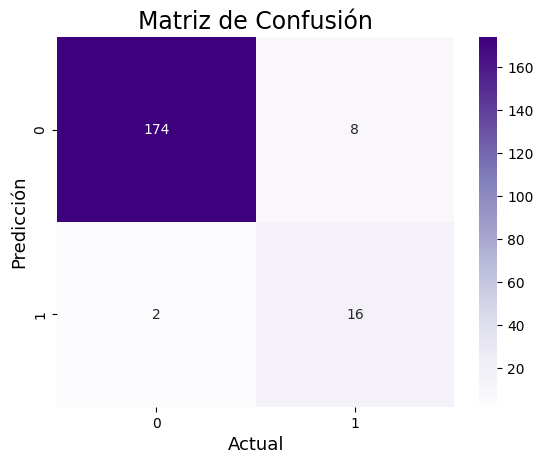

In [41]:
# Visualizo la matriz de confusión de un modelo de clasificación utilizando la biblioteca Seaborn y Matplotlib en Python.
# La matriz de confusión habla de qué tan bien ha evaluado el algoritmo la clasificación, en este caso, de los pokemones legendarios o no legendarios con respecto
# a las propiedades de Total y Resitence.

sns.heatmap(cm,
 annot=True,
 fmt='g',
 cmap='Purples')
plt.ylabel('Predicción',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Matriz de Confusión',fontsize=17)
plt.show()


In [42]:
# Las predicciones correctas son los valores numericos que se encuentran en el cuadrado superior a la izquierda junto con las que se encuentran en el cuadrado inferior a la derecha.
# Mientras que las predicciones incorrectas son los valores numericos que se encuentran en el cuadrado superior a la derecha junto con las que se encuentran en el cuadrado inferior a la izquierda.

In [43]:
# OBESERVACIÓN

# El cuadrado superior izquierdo con un valor de 174 representa la cantidad de instancias clasificadas correctamente como clase 0.
# El cuadrado superior derecho con un valor de 8 representa la cantidad de instancias clasificadas incorrectamente como clase 1 cuando en realidad son de clase 0.
# El cuadrado inferior izquierdo con un valor de 2 representa la cantidad de instancias clasificadas incorrectamente como clase 0 cuando en realidad son de clase 1.
# El cuadrado inferior derecho con un valor de 16 representa la cantidad de instancias clasificadas correctamente como clase 1.

# Noto que hay un gran numero de predicciones calificadas como correctas, 190 aplicando la suma de los valores correctos, a diferencia de los 10 casos incorrectos.
# Además en el caso del cuadrado superior izquierdo, clase 0, que son las predicciones correctas, presenta un color purpura intenso a diferencia de los demás. 
# Tambien se detecta una variación del color para el caso del cuadrado inferior derecho, clase 1, que son las predicciones correctas, presentando con un tono más gris y diferenciandose del blanco de las instancias incorrectas.
# Estas observaciones son mejores que las vistas en el caso de clasficiación de Regresión Logística.
# Esto podriamos considerarlo como un mejor primer indicio del modelo.

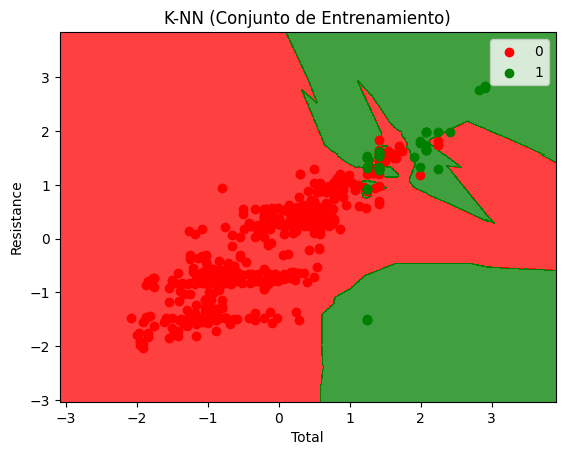

In [44]:
# Visualización del modelo de clasificación en el conjunto de Entrenamiento.

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
 np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
 alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
 plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
 color = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Conjunto de Entrenamiento)')
plt.xlabel('Total')
plt.ylabel('Resistance')
plt.legend()
plt.show()


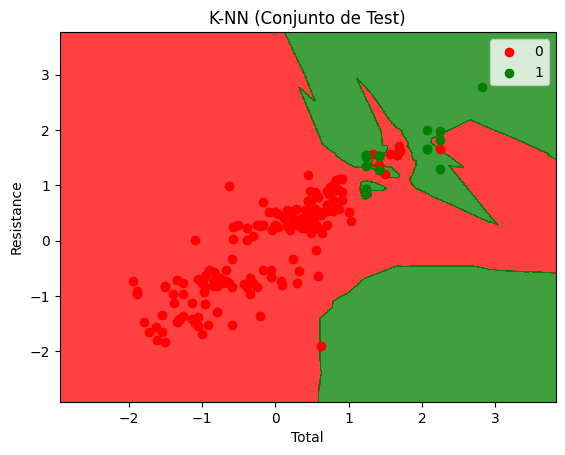

In [45]:
# Visualización del modelo de clasificación en el conjunto de Test.

X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
 np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
 alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
 plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
 color = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Conjunto de Test)')
plt.xlabel('Total')
plt.ylabel('Resistance')
plt.legend()
plt.show()

In [46]:
# Ahora analizaré diferentes métricas de evaluación del rendimiento de un modelo de clasificación.
# Precisión del modelo: La precisión mide la proporción de instancias positivas que fueron correctamente clasificadas como positivas.
# Exactitud del modelo: La exactitud es la proporción total de predicciones correctas realizadas por el modelo. 
# Sensibilidad del modelo: La sensibilidad, también conocida como tasa de verdaderos positivos o recall, mide la proporción de instancias positivas que fueron correctamente identificadas por el modelo.
# Puntaje F1 del modelo: El puntaje F1 es una medida que combina la precisión y la sensibilidad en un solo valor. Es útil cuando se busca un equilibrio entre la precisión y la sensibilidad.
# Curva ROC - AUC del modelo: La curva ROC, y el área bajo la curva (AUC) son métricas utilizadas para evaluar el rendimiento de un modelo de clasificación en problemas de clasificación binaria. La curva ROC representa la relación entre la tasa de verdaderos positivos y la tasa de falsos positivos para diferentes umbrales de clasificación. El AUC mide la capacidad del modelo para distinguir entre las clases. 

In [47]:
print(f'Precisión del modelo: {precision_score(y_test, y_pred):.2f}')
print(f'Exactitud del modelo:{accuracy_score(y_test, y_pred):.2f}')
print(f'Sensibilidad del modelo: {recall_score(y_test, y_pred):.2f}')
print(f'Puntaje F1 del modelo:{f1_score(y_test, y_pred):.2f}')
print(f'Curva ROC - AUC del modelo:{roc_auc_score(y_test, y_pred):.2f}')

Precisión del modelo: 0.67
Exactitud del modelo:0.95
Sensibilidad del modelo: 0.89
Puntaje F1 del modelo:0.76
Curva ROC - AUC del modelo:0.92


In [48]:
# Imprimo las métricas de evaluación del modelo proporcionan información adicional sobre el rendimiento del modelo en términos de precisión, exactitud, sensibilidad, puntaje F1 y el área bajo la curva ROC-AUC.

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97       182
           1       0.67      0.89      0.76        18

    accuracy                           0.95       200
   macro avg       0.83      0.92      0.87       200
weighted avg       0.96      0.95      0.95       200



In [49]:
# Definiciones de otros datos

# Macro avg: Calcula el promedio sin tener en cuenta el desequilibrio en el número de muestras de cada clase. 
# Para cada métrica, se calcula la media de los valores para todas las clases y se informa como el promedio macro avg.
# Se trata de un promedio no ponderado en el que todas las clases tienen el mismo peso. 
# Este enfoque considera que todas las clases son igualmente importantes y le asigna la misma importancia a cada clase al calcular el promedio.

# Weighted avg: Calcula el promedio ponderado teniendo en cuenta el número de muestras en cada clase. 
# Para cada métrica, se calcula la media ponderada de los valores para todas las clases y se informa como el promedio weighted avg. 
# En este enfoque, se asigna un peso proporcional al número de muestras de cada clase. 
# Las clases con más muestras tienen un impacto mayor en el cálculo del promedio. 
# Este enfoque es útil cuando hay un desequilibrio significativo en el número de muestras entre las clases.


# Para la conclución me centraré en los valores específicos obtenidos de cada clase en lugar de los promedios macro avg y weighted avg. 
# Los valores específicos de cada clase proporcionan información más detallada y relevante sobre cómo el modelo está clasificando cada clase individualmente.
# El enfoque en los valores de cada clase es considerablemente más importante cuando hay un desequilibrio significativo en el número de muestras entre las clases. 
# En estos casos, los promedios pueden verse afectados por la clase dominante y no reflejar adecuadamente el rendimiento del modelo en las clases minoritarias.
# Por lo tanto, los valores específicos de cada clase ofrecen una visión más detallada y proporcionan mayor eficiencia en las conclusiones del rendimiento del modelo de clasificación.

In [50]:
# Conclusión

# Dado los resultados obtenidos con las diferentes metricas e informes puedo sacar las siguientes conclusiones adicionales.
# El modelo tiene una precisión muy alta para la clase 0 con un 99% lo cual es algo altamente positivo.
# Sin embargo, con respecto a la clase 1 el porcentaje de presición baja teniendo un valor de presición del 67%.
# La exactitud o accuracy, es devolvió un porcentaje muy elevado del 95% lo que significa que un muy alto numero de instancias se clasificaron correctamente en general sobre el total de instancias.
# En general, un mayor valor de exactitud o accuracy indica un mejor rendimiento del modelo, pero tambien puede ser engañoso en casos de desequilibrio de clases, donde una clase dominante puede influir en el resultado.
# Por lo tanto es un dato que hay que tomarlo con cierto cuidado.
# Otro aspecto a tener en cuenta es que la sensibilidad con respecto a la clase 0 es del 96%, por lo que el modelo es capaz de identificar de manera confiable la mayoría de las instancias de esa clase.
# Mientras que en la clase 1, la sensibilidad es del 86%, es un numero bastante bueno tambien, y aun más teniendo en cuenta el valor de 39% obtenido en el modelo anterior.
# El Puntaje F1, que es una medida que combina precisión y sensibilidad para evaluar el equilibrio entre ambas, arroja una diferenciación moderada, 97% para la clase 0 lo cual es muy bueno, y 76% para la clase 1 siendo un porcentaje moderado que no está mal pero podria ser mejor.
# Finalmente el porcentaje arrojado por Curva ROC - AUC del modelo es del 92%, el cual es un valor muy por arriba del 50% (50% indica un modelo que clasifica las instancias de manera aleatoria), y podemos determinar que separa las clases positivas y negativas de buena manera.

# Mi conclusión final de este modelo de clasificación de K-Nearest Neighbors, para este caso particular, es que posee un rendimiento moderadamente bueno, ya que pese a tener un buen porcentaje de exactitud, un buen porcentaje de Curva ROC - AUC del modelo, y que tambien presenta buenos valores para la clase 0, se encuentran valores que podrian ser mejores cuando tiene que clasificar a la clase 1, 
# Como el caso de la presición con su 67% y el f1-score de 76% tambien podria ser mejor. 
# Dado a los porcentajes obtenidos se concluye que, para este caso, este modelo de clasificación de K-Nearest Neighbors resulta mas eficiente y confiable que el de Regresión Logística.

In [51]:
# Clasificación con Máquinas de soporte vectorial

# es un método de aprendizaje automático supervisado utilizado para la clasificación de datos. 
# SVM busca encontrar un hiperplano en un espacio de características que mejor separe las diferentes clases de datos.


In [52]:
# Importo las librerias que me brinda Python.

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score,\
 recall_score, f1_score, roc_auc_score, classification_report
from matplotlib.colors import ListedColormap
import warnings

In [53]:
# Realizo la importación de los datos.
# Ignoro las advertencias generadas por el módulo warnings en Python.

warnings.filterwarnings("ignore")
df = pd.read_csv('pokemonResistance.csv', low_memory=False)
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Winbattle,Resistance
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,35,450
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,50,730
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,75,940
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,86,1110
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,40,500


In [54]:
# Para este analisis tomaré los valores de Total y Resistance para la variable X independiente.
# Y los valores de Legendary para la variable Y dependiente.

In [55]:
# Consulto si hay algún valor null (NaN), me devolverá un booleano que en caso de ser true es porque si hay valores Nan.

df.isnull().values.any()

True

In [56]:
# Averiguo en que columnas hay valores null.

df.isnull().any()

#             False
Name          False
Type 1        False
Type 2         True
Total         False
HP            False
Attack        False
Defense       False
Sp. Atk       False
Sp. Def       False
Speed         False
Generation    False
Legendary     False
Winbattle     False
Resistance    False
dtype: bool

In [57]:
# Constato que únicamente hay valores null en la columna Type2, por lo que no hay inconvenientes en tomar los datos de Total, Resistence y Legendary.

In [58]:
# Coloco los datos de las columnas Total y Resistance en la variable X.
# Coloco los datos de la columna Legendary en la variable y.

X = df.iloc[:, [4,14]].values
y = df.iloc[:, 12].values
X,y

(array([[ 318,  450],
        [ 405,  730],
        [ 525,  940],
        ...,
        [ 600, 1095],
        [ 680, 1135],
        [ 600, 1030]], dtype=int64),
 array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, Fa

In [59]:
# Utilizo LabelEnconder para convertir a números los datos categóricos de la columna Legendary almacenados en la variable y.

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y = y_encoded 
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [60]:
# Imprimo nuevamente mis variables con sus datos.

X,y

(array([[ 318,  450],
        [ 405,  730],
        [ 525,  940],
        ...,
        [ 600, 1095],
        [ 680, 1135],
        [ 600, 1030]], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 

In [61]:
# Utilizo train_test_split para dividir un dataset en bloques. 
# Conjunto de testing por un lado y conjunto de entrenamiento por el otro.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [62]:
# Escalo los datos (variables)
# El escalado va a transformar los valores de las características de forma que estén confinados en un rango [a, b], típicamente [0, 1] o [-1, 1].

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [63]:
# Ajusto el modelo de regresión logística con el conjunto de entrenamiento.
# Esto se hace para hacer predicciones en los datos de prueba y mostrar una tabla que compara las etiquetas reales con las etiquetas predichas para una muestra de prueba limitada.

classifier = SVC(kernel = "linear", random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
pd.DataFrame({'Actual': y_test, 'Predicción': y_pred}).head(100)

,Actual,Predicción
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
95,0,1
96,0,0
97,1,0
98,0,0


In [64]:
# Construyo la matriz de confusión, la cual es una técnica muy potente. 
# Se calcula sobre el conjunto de testing y se puede observar si las predicciones que ha realizado el algoritmo son potentes

cm = confusion_matrix(y_test, y_pred)
cm

array([[176,   6],
       [ 11,   7]], dtype=int64)

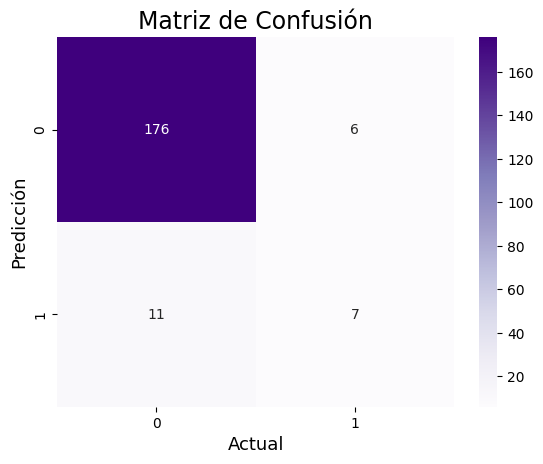

In [65]:
# Visualizo la matriz de confusión de un modelo de clasificación utilizando la biblioteca Seaborn y Matplotlib en Python.
# La matriz de confusión habla de qué tan bien ha evaluado el algoritmo la clasificación, en este caso, de los pokemones legendarios o no legendarios con respecto
# a las propiedades de Total y Resitence.

sns.heatmap(cm,
 annot=True,
 fmt='g',
 cmap='Purples')
plt.ylabel('Predicción',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Matriz de Confusión',fontsize=17)
plt.show()

In [66]:
# Las predicciones correctas son los valores numericos que se encuentran en el cuadrado superior a la izquierda junto con las que se encuentran en el cuadrado inferior a la derecha.
# Mientras que las predicciones incorrectas son los valores numericos que se encuentran en el cuadrado superior a la derecha junto con las que se encuentran en el cuadrado inferior a la izquierda.

In [67]:
# OBESERVACIÓN

# El cuadrado superior izquierdo con un valor de 176 representa la cantidad de instancias clasificadas correctamente como clase 0.
# El cuadrado superior derecho con un valor de 6 representa la cantidad de instancias clasificadas incorrectamente como clase 1 cuando en realidad son de clase 0.
# El cuadrado inferior izquierdo con un valor de 11 representa la cantidad de instancias clasificadas incorrectamente como clase 0 cuando en realidad son de clase 1.
# El cuadrado inferior derecho con un valor de 7 representa la cantidad de instancias clasificadas correctamente como clase 1.

# Noto que hay un gran numero de predicciones calificadas como correctas, 183 aplicando la suma de los valores correctos, a diferencia de los 17 casos incorrectos.
# Además en el caso del cuadrado superior izquierdo, clase 0, que son las predicciones correctas, presenta un color purpura intenso a diferencia de los demás. 
# Estas observaciones son identicas que las vistas en el caso de clasficiación de Regresión Logística.
# De igual forma, podriamos considerar estos valores obtenidos en la matriz de confusión como un buen primer indicio del modelo.

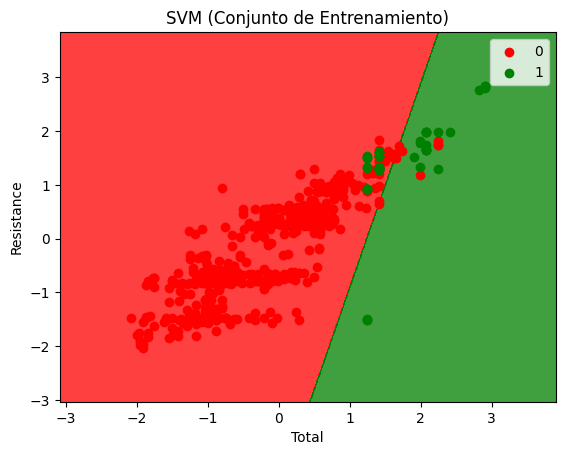

In [68]:
# Visualización del modelo de clasificación en el conjunto de Entrenamiento.

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
 np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
 alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
 plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
 color = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Conjunto de Entrenamiento)')
plt.xlabel('Total')
plt.ylabel('Resistance')
plt.legend()
plt.show()

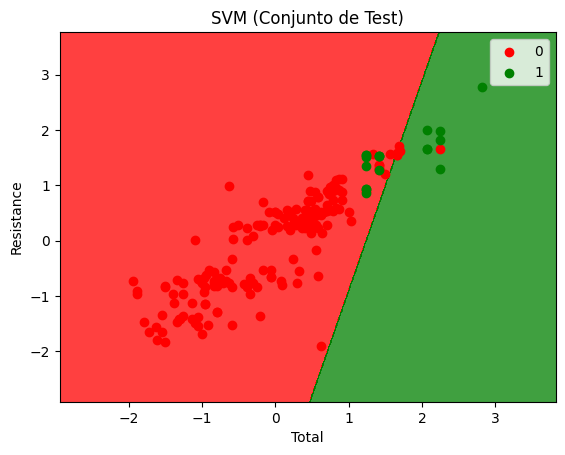

In [69]:
# Visualización del modelo de clasificación en el conjunto de Test.

X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
 np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
 alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
 plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
 color = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Conjunto de Test)')
plt.xlabel('Total')
plt.ylabel('Resistance')
plt.legend()
plt.show()

In [70]:
# Ahora analizaré diferentes métricas de evaluación del rendimiento de un modelo de clasificación.
# Precisión del modelo: La precisión mide la proporción de instancias positivas que fueron correctamente clasificadas como positivas.
# Exactitud del modelo: La exactitud es la proporción total de predicciones correctas realizadas por el modelo. 
# Sensibilidad del modelo: La sensibilidad, también conocida como tasa de verdaderos positivos o recall, mide la proporción de instancias positivas que fueron correctamente identificadas por el modelo.
# Puntaje F1 del modelo: El puntaje F1 es una medida que combina la precisión y la sensibilidad en un solo valor. Es útil cuando se busca un equilibrio entre la precisión y la sensibilidad.
# Curva ROC - AUC del modelo: La curva ROC, y el área bajo la curva (AUC) son métricas utilizadas para evaluar el rendimiento de un modelo de clasificación en problemas de clasificación binaria. La curva ROC representa la relación entre la tasa de verdaderos positivos y la tasa de falsos positivos para diferentes umbrales de clasificación. El AUC mide la capacidad del modelo para distinguir entre las clases. 

In [71]:
print(f'Precisión del modelo: {precision_score(y_test, y_pred):.2f}')
print(f'Exactitud del modelo:{accuracy_score(y_test, y_pred):.2f}')
print(f'Sensibilidad del modelo: {recall_score(y_test, y_pred):.2f}')
print(f'Puntaje F1 del modelo:{f1_score(y_test, y_pred):.2f}')
print(f'Curva ROC - AUC del modelo:{roc_auc_score(y_test, y_pred):.2f}')

Precisión del modelo: 0.54
Exactitud del modelo:0.92
Sensibilidad del modelo: 0.39
Puntaje F1 del modelo:0.45
Curva ROC - AUC del modelo:0.68


In [72]:
# Imprimo las métricas de evaluación del modelo proporcionan información adicional sobre el rendimiento del modelo en términos de precisión, exactitud, sensibilidad, puntaje F1 y el área bajo la curva ROC-AUC.

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       182
           1       0.54      0.39      0.45        18

    accuracy                           0.92       200
   macro avg       0.74      0.68      0.70       200
weighted avg       0.90      0.92      0.91       200



In [73]:
# Definiciones de otros datos

# Macro avg: Calcula el promedio sin tener en cuenta el desequilibrio en el número de muestras de cada clase. 
# Para cada métrica, se calcula la media de los valores para todas las clases y se informa como el promedio macro avg.
# Se trata de un promedio no ponderado en el que todas las clases tienen el mismo peso. 
# Este enfoque considera que todas las clases son igualmente importantes y le asigna la misma importancia a cada clase al calcular el promedio.

# Weighted avg: Calcula el promedio ponderado teniendo en cuenta el número de muestras en cada clase. 
# Para cada métrica, se calcula la media ponderada de los valores para todas las clases y se informa como el promedio weighted avg. 
# En este enfoque, se asigna un peso proporcional al número de muestras de cada clase. 
# Las clases con más muestras tienen un impacto mayor en el cálculo del promedio. 
# Este enfoque es útil cuando hay un desequilibrio significativo en el número de muestras entre las clases.


# Para la conclución me centraré en los valores específicos obtenidos de cada clase en lugar de los promedios macro avg y weighted avg. 
# Los valores específicos de cada clase proporcionan información más detallada y relevante sobre cómo el modelo está clasificando cada clase individualmente.
# El enfoque en los valores de cada clase es considerablemente más importante cuando hay un desequilibrio significativo en el número de muestras entre las clases. 
# En estos casos, los promedios pueden verse afectados por la clase dominante y no reflejar adecuadamente el rendimiento del modelo en las clases minoritarias.
# Por lo tanto, los valores específicos de cada clase ofrecen una visión más detallada y proporcionan mayor eficiencia en las conclusiones del rendimiento del modelo de clasificación.

In [74]:
# Conclusión

# Dado los resultados obtenidos con las diferentes metricas e informes puedo sacar las siguientes conclusiones adicionales.
# El modelo tiene una precisión alta para la clase 0 con un 94% lo cual es algo altamente positivo.
# Sin embargo, con respecto a la clase 1 el porcentaje de presición baja considerablemente teniendo apenas un 54% de presición.
# La exactitud o accuracy, es devolvió un porcentaje muy elevado del 92% lo que significa que un muy alto numero de instancias se clasificaron correctamente en general sobre el total de instancias.
# En general, un mayor valor de exactitud o accuracy indica un mejor rendimiento del modelo, pero tambien puede ser engañoso en casos de desequilibrio de clases, donde una clase dominante puede influir en el resultado.
# Por lo tanto es un dato que hay que tomarlo con cierto cuidado.
# Otro aspecto a tener en cuenta es que la sensibilidad con respecto a la clase 0 es del 97%, por lo que el modelo es capaz de identificar de manera confiable la mayoría de las instancias de esa clase.
# Aunque el inconveniente vuelve a surgir en la clase 1, en donde la sensibilidad desciende hasta el valor de 39% lo que es considerablemente bajo.
# El Puntaje F1, que es una medida que combina precisión y sensibilidad para evaluar el equilibrio entre ambas, vuelve arrojar una diferenciación muy marcada, 95% para la clase 0 lo cual es muy bueno, pero 45% para la clase 1 siendo un porcentaje bajo.
# Finalmente el porcentaje arrojado por Curva ROC - AUC del modelo es del 68%, el cual es un valor por arriba del 50% (50% indica un modelo que clasifica las instancias de manera aleatoria), aunque lo esperado sería un valor aun más alto del modelo para separar las clases positivas y negativas y evitando cometer errores.

# Mi conclusión final de este modelo de clasificación SVM, para este caso, es que posee un rendimiento regular, similar al de Regresión Logística, ya que pese a tener un buen porcentaje de exactitud y que tambien presenta buenos valores para la clase 0, se encuentran inconvenientes cuando tiene que clasificar a la clase 1, dado a los porcentajes obtenidos se concluye que no lo hace de forma eficiente ni confiable.

In [75]:
# SVM tipo soft margin, para obtener el hiperplano óptimo

# El caso visto anteriormente tiene poca aplicación práctica porque se encuentran casos en los que las clases sean perfecta y linealmente separables.
# El caso anterior de SVM tambien es muy sensible a variaciones en los datos y presenta problemas de overfitting.
# Por esta razón es preferible crear un clasificador basado en un hiperplano que, aunque no separe perfectamente las dos clases, sea más robusto y tenga mayor capacidad predictiva al aplicarlo a nuevas observaciones, es decir, menos problemas de overfitting.

In [76]:
# Importo las librerias que me brinda Python.

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score,\
 recall_score, f1_score, roc_auc_score, classification_report
from matplotlib.colors import ListedColormap
import warnings

In [77]:
# Realizo la importación de los datos.
# Ignoro las advertencias generadas por el módulo warnings en Python.

warnings.filterwarnings("ignore")
df = pd.read_csv('pokemonResistance.csv', low_memory=False)
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Winbattle,Resistance
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,35,450
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,50,730
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,75,940
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,86,1110
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,40,500


In [78]:
# Para este analisis tomaré los valores de Total y Resistance para la variable X independiente.
# Y los valores de Legendary para la variable Y dependiente.

In [79]:
# Consulto si hay algún valor null (NaN), me devolverá un booleano que en caso de ser true es porque si hay valores Nan.

df.isnull().values.any()

True

In [80]:
# Averiguo en que columnas hay valores null.

df.isnull().any()

#             False
Name          False
Type 1        False
Type 2         True
Total         False
HP            False
Attack        False
Defense       False
Sp. Atk       False
Sp. Def       False
Speed         False
Generation    False
Legendary     False
Winbattle     False
Resistance    False
dtype: bool

In [81]:
# Constato que únicamente hay valores null en la columna Type2, por lo que no hay inconvenientes en tomar los datos de Total, Resistence y Legendary.

In [82]:
# Coloco los datos de las columnas Total y Resistance en la variable X.
# Coloco los datos de la columna Legendary en la variable y.

X = df.iloc[:, [4,14]].values 
y = df.iloc[:, 12].values
X,y

(array([[ 318,  450],
        [ 405,  730],
        [ 525,  940],
        ...,
        [ 600, 1095],
        [ 680, 1135],
        [ 600, 1030]], dtype=int64),
 array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, Fa

In [83]:
# Utilizo LabelEnconder para convertir a números los datos categóricos de la columna Legendary almacenados en la variable y.

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y = y_encoded 
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [84]:
# Imprimo nuevamente mis variables con sus datos.

X,y

(array([[ 318,  450],
        [ 405,  730],
        [ 525,  940],
        ...,
        [ 600, 1095],
        [ 680, 1135],
        [ 600, 1030]], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 

In [85]:
# Utilizo train_test_split para dividir un dataset en bloques. 
# Conjunto de testing por un lado y conjunto de entrenamiento por el otro.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [86]:
# Escalo los datos (variables)
# El escalado va a transformar los valores de las características de forma que estén confinados en un rango [a, b], típicamente [0, 1] o [-1, 1].

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [87]:
classifier = SVC(kernel = "rbf", random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
pd.DataFrame({'Actual': y_test, 'Predicción': y_pred}).head(100)

,Actual,Predicción
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
95,0,1
96,0,0
97,1,0
98,0,0


In [88]:
# Construyo la matriz de confusión, la cual es una técnica muy potente. 
# Se calcula sobre el conjunto de testing y se puede observar si las predicciones que ha realizado el algoritmo son potentes

cm = confusion_matrix(y_test, y_pred)
cm

array([[175,   7],
       [ 11,   7]], dtype=int64)

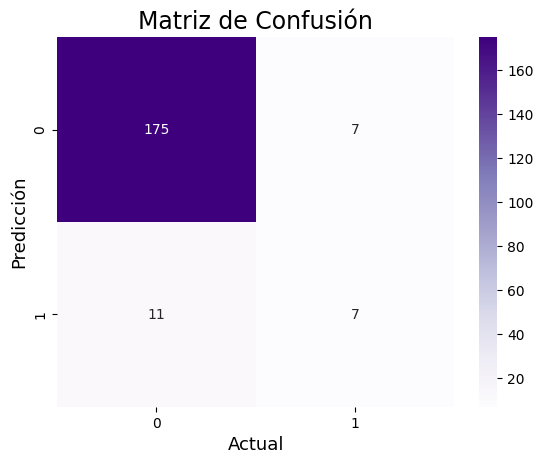

In [89]:
# Visualizo la matriz de confusión de un modelo de clasificación utilizando la biblioteca Seaborn y Matplotlib en Python.
# La matriz de confusión habla de qué tan bien ha evaluado el algoritmo la clasificación, en este caso, de los pokemones legendarios o no legendarios con respecto
# a las propiedades de Total y Resitence.

sns.heatmap(cm,
 annot=True,
 fmt='g',
 cmap='Purples')
plt.ylabel('Predicción',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Matriz de Confusión',fontsize=17)
plt.show()

In [90]:
# Las predicciones correctas son los valores numericos que se encuentran en el cuadrado superior a la izquierda junto con las que se encuentran en el cuadrado inferior a la derecha.
# Mientras que las predicciones incorrectas son los valores numericos que se encuentran en el cuadrado superior a la derecha junto con las que se encuentran en el cuadrado inferior a la izquierda.

In [91]:
# OBESERVACIÓN

# El cuadrado superior izquierdo con un valor de 175 representa la cantidad de instancias clasificadas correctamente como clase 0.
# El cuadrado superior derecho con un valor de 7 representa la cantidad de instancias clasificadas incorrectamente como clase 1 cuando en realidad son de clase 0.
# El cuadrado inferior izquierdo con un valor de 11 representa la cantidad de instancias clasificadas incorrectamente como clase 0 cuando en realidad son de clase 1.
# El cuadrado inferior derecho con un valor de 7 representa la cantidad de instancias clasificadas correctamente como clase 1.

# Noto que hay un gran numero de predicciones calificadas como correctas, 182 aplicando la suma de los valores correctos, a diferencia de los 18 casos incorrectos.
# Además en el caso de el cuadrado superior izquierdo, clase 0, que son las predicciones correctas, presenta un color purpura intenso a diferencia de los demás.
# Observo resultados muy similares a los de Regresión Logística y SVM sin soft margin.
# Esto podriamos considerarlo como un buen primer indicio del modelo.

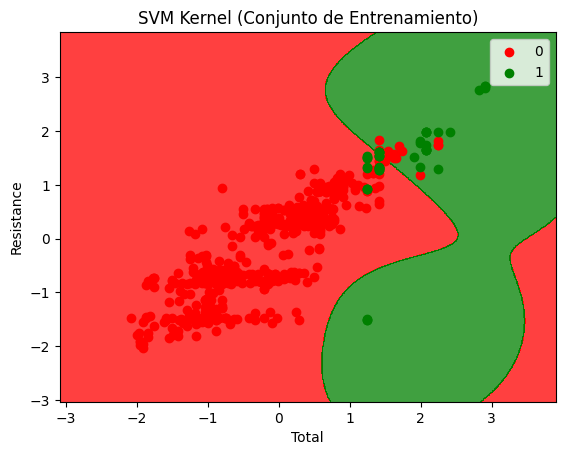

In [92]:
# Visualización del modelo de clasificación en el conjunto de Entrenamiento.

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
 np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
 alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
 plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
 color = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM Kernel (Conjunto de Entrenamiento)')
plt.xlabel('Total')
plt.ylabel('Resistance')
plt.legend()
plt.show()

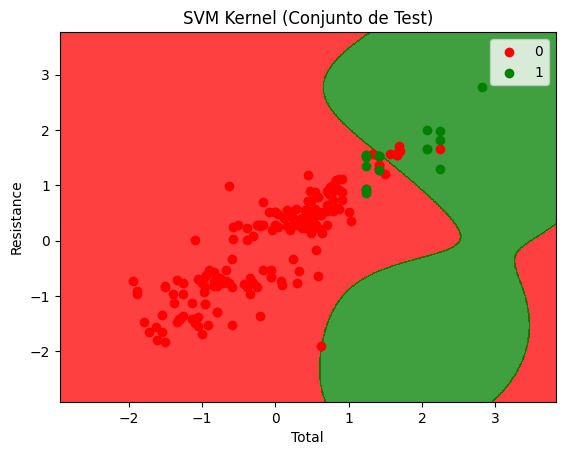

In [93]:
# Visualización del modelo de clasificación en el conjunto de Test.

X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
 np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
 alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
 plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
 color = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM Kernel (Conjunto de Test)')
plt.xlabel('Total')
plt.ylabel('Resistance')
plt.legend()
plt.show()

In [94]:
# Ahora analizaré diferentes métricas de evaluación del rendimiento de un modelo de clasificación.
# Precisión del modelo: La precisión mide la proporción de instancias positivas que fueron correctamente clasificadas como positivas.
# Exactitud del modelo: La exactitud es la proporción total de predicciones correctas realizadas por el modelo. 
# Sensibilidad del modelo: La sensibilidad, también conocida como tasa de verdaderos positivos o recall, mide la proporción de instancias positivas que fueron correctamente identificadas por el modelo.
# Puntaje F1 del modelo: El puntaje F1 es una medida que combina la precisión y la sensibilidad en un solo valor. Es útil cuando se busca un equilibrio entre la precisión y la sensibilidad.
# Curva ROC - AUC del modelo: La curva ROC, y el área bajo la curva (AUC) son métricas utilizadas para evaluar el rendimiento de un modelo de clasificación en problemas de clasificación binaria. La curva ROC representa la relación entre la tasa de verdaderos positivos y la tasa de falsos positivos para diferentes umbrales de clasificación. El AUC mide la capacidad del modelo para distinguir entre las clases. 

In [95]:
print(f'Precisión del modelo: {precision_score(y_test, y_pred):.2f}')
print(f'Exactitud del modelo:{accuracy_score(y_test, y_pred):.2f}')
print(f'Sensibilidad del modelo: {recall_score(y_test, y_pred):.2f}')
print(f'Puntaje F1 del modelo:{f1_score(y_test, y_pred):.2f}')
print(f'Curva ROC - AUC del modelo:{roc_auc_score(y_test, y_pred):.2f}')

Precisión del modelo: 0.50
Exactitud del modelo:0.91
Sensibilidad del modelo: 0.39
Puntaje F1 del modelo:0.44
Curva ROC - AUC del modelo:0.68


In [96]:
# Imprimo las métricas de evaluación del modelo proporcionan información adicional sobre el rendimiento del modelo en términos de precisión, exactitud, sensibilidad, puntaje F1 y el área bajo la curva ROC-AUC.

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       182
           1       0.50      0.39      0.44        18

    accuracy                           0.91       200
   macro avg       0.72      0.68      0.69       200
weighted avg       0.90      0.91      0.90       200



In [97]:
# Definiciones de otros datos

# Macro avg: Calcula el promedio sin tener en cuenta el desequilibrio en el número de muestras de cada clase. 
# Para cada métrica, se calcula la media de los valores para todas las clases y se informa como el promedio macro avg.
# Se trata de un promedio no ponderado en el que todas las clases tienen el mismo peso. 
# Este enfoque considera que todas las clases son igualmente importantes y le asigna la misma importancia a cada clase al calcular el promedio.

# Weighted avg: Calcula el promedio ponderado teniendo en cuenta el número de muestras en cada clase. 
# Para cada métrica, se calcula la media ponderada de los valores para todas las clases y se informa como el promedio weighted avg. 
# En este enfoque, se asigna un peso proporcional al número de muestras de cada clase. 
# Las clases con más muestras tienen un impacto mayor en el cálculo del promedio. 
# Este enfoque es útil cuando hay un desequilibrio significativo en el número de muestras entre las clases.


# Para la conclución me centraré en los valores específicos obtenidos de cada clase en lugar de los promedios macro avg y weighted avg. 
# Los valores específicos de cada clase proporcionan información más detallada y relevante sobre cómo el modelo está clasificando cada clase individualmente.
# El enfoque en los valores de cada clase es considerablemente más importante cuando hay un desequilibrio significativo en el número de muestras entre las clases. 
# En estos casos, los promedios pueden verse afectados por la clase dominante y no reflejar adecuadamente el rendimiento del modelo en las clases minoritarias.
# Por lo tanto, los valores específicos de cada clase ofrecen una visión más detallada y proporcionan mayor eficiencia en las conclusiones del rendimiento del modelo de clasificación.

In [98]:
# Conclusión

# Dado los resultados obtenidos con las diferentes metricas e informes puedo sacar las siguientes conclusiones adicionales.
# El modelo tiene una precisión alta para la clase 0 con un 94% lo cual es algo altamente positivo.
# Sin embargo, con respecto a la clase 1 el porcentaje de presición baja bastante teniendo apenas la mitad de presición, un 50%.
# La exactitud o accuracy, es devolvió un porcentaje muy elevado del 91% lo que significa que un muy alto numero de instancias se clasificaron correctamente en general sobre el total de instancias.
# En general, un mayor valor de exactitud o accuracy indica un mejor rendimiento del modelo, pero tambien puede ser engañoso en casos de desequilibrio de clases, donde una clase dominante puede influir en el resultado.
# Por lo tanto es un dato que hay que tomarlo con cierto cuidado.
# Otro aspecto a tener en cuenta es que la sensibilidad con respecto a la clase 0 es del 96%, por lo que el modelo es capaz de identificar de manera confiable la mayoría de las instancias de esa clase.
# Aunque el inconveniente vuelve a surgir en la clase 1, en donde la sensibilidad desciende hasta el valor de 39% lo que es considerablemente bajo.
# El Puntaje F1, que es una medida que combina precisión y sensibilidad para evaluar el equilibrio entre ambas, vuelve arrojar una diferenciación muy marcada, 95% para la clase 0 lo cual es muy bueno, pero 44% para la clase 1 siendo un porcentaje bajo.
# Finalmente el porcentaje arrojado por Curva ROC - AUC del modelo es del 68%, el cual es un valor por arriba del 50% (50% indica un modelo que clasifica las instancias de manera aleatoria), aunque lo esperado sería un valor aun más alto del modelo para separar las clases positivas y negativas y evitando cometer errores.

# Mi conclusión final de este modelo de clasificación SVM tipo soft margin, para este caso, es que posee un rendimiento regular, ya que pese a tener un buen porcentaje de exactitud y que tambien presenta buenos valores para la clase 0, se encuentran inconvenientes cuando tiene que clasificar a la clase 1, dado a los porcentajes obtenidos se concluye que no lo hace de forma eficiente ni confiable.
# Por el momento es el modelo menos confiable para este caso.

In [99]:
# Naive Bayes

# Es un método de aprendizaje automático supervisado que se basa en el teorema de Bayes y la suposición de independencia condicional entre las características.
# El algoritmo Naive Bayes se basa en el teorema de Bayes, que establece la relación entre las probabilidades condicionales inversas.
# El teorema de Bayes establece que la probabilidad de una hipótesis dado un conjunto de evidencias se puede calcular utilizando la probabilidad de la evidencia dado la hipótesis y las probabilidades previas de las hipótesis y las evidencias.
# Para clasificar una nueva instancia, el algoritmo Naive Bayes calcula la probabilidad posterior de cada clase dada la instancia utilizando el teorema de Bayes. Se selecciona la clase con la probabilidad posterior más alta como la predicción del algoritmo.

In [100]:
# Importo las librerias que me brinda Python.

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score,\
 recall_score, f1_score, roc_auc_score, classification_report
from matplotlib.colors import ListedColormap
import warnings

In [101]:
# Realizo la importación de los datos.
# Ignoro las advertencias generadas por el módulo warnings en Python.

warnings.filterwarnings("ignore")
df = pd.read_csv('pokemonResistance.csv', low_memory=False)
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Winbattle,Resistance
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,35,450
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,50,730
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,75,940
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,86,1110
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,40,500


In [102]:
# Para este analisis tomaré los valores de Total y Resistance para la variable X independiente.
# Y los valores de Legendary para la variable Y dependiente.

In [103]:
# Consulto si hay algún valor null (NaN), me devolverá un booleano que en caso de ser true es porque si hay valores Nan.

df.isnull().values.any()

True

In [104]:
# Averiguo en que columnas hay valores null.

df.isnull().any()

#             False
Name          False
Type 1        False
Type 2         True
Total         False
HP            False
Attack        False
Defense       False
Sp. Atk       False
Sp. Def       False
Speed         False
Generation    False
Legendary     False
Winbattle     False
Resistance    False
dtype: bool

In [105]:
# Constato que únicamente hay valores null en la columna Type2, por lo que no hay inconvenientes en tomar los datos de Total, Resistence y Legendary.

In [106]:
# Coloco los datos de las columnas Total y Resistance en la variable X.
# Coloco los datos de la columna Legendary en la variable y.

X = df.iloc[:, [4,14]].values 
y = df.iloc[:, 12].values
X,y

(array([[ 318,  450],
        [ 405,  730],
        [ 525,  940],
        ...,
        [ 600, 1095],
        [ 680, 1135],
        [ 600, 1030]], dtype=int64),
 array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, Fa

In [107]:
# Utilizo LabelEnconder para convertir a números los datos categóricos de la columna Legendary almacenados en la variable y.

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y = y_encoded 
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [108]:
# Imprimo nuevamente mis variables con sus datos.

X,y

(array([[ 318,  450],
        [ 405,  730],
        [ 525,  940],
        ...,
        [ 600, 1095],
        [ 680, 1135],
        [ 600, 1030]], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 

In [109]:
# Utilizo train_test_split para dividir un dataset en bloques. 
# Conjunto de testing por un lado y conjunto de entrenamiento por el otro.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [110]:
# Escalo los datos (variables)
# El escalado va a transformar los valores de las características de forma que estén confinados en un rango [a, b], típicamente [0, 1] o [-1, 1].

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [111]:
# Ajusto el modelo de regresión logística con el conjunto de entrenamiento.
# Esto se hace para hacer predicciones en los datos de prueba y mostrar una tabla que compara las etiquetas reales con las etiquetas predichas para una muestra de prueba limitada.

classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
pd.DataFrame({'Actual': y_test, 'Predicción': y_pred}).head(100)

,Actual,Predicción
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
95,0,1
96,0,0
97,1,0
98,0,0


In [112]:
# Construyo la matriz de confusión, la cual es una técnica muy potente. 
# Se calcula sobre el conjunto de testing y se puede observar si las predicciones que ha realizado el algoritmo son potentes

cm = confusion_matrix(y_test, y_pred)
cm

array([[168,  14],
       [  3,  15]], dtype=int64)

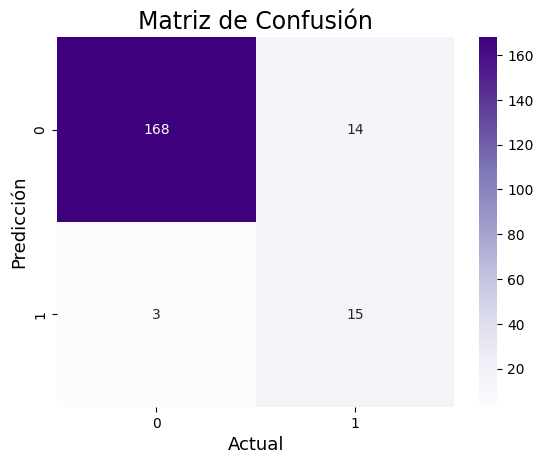

In [113]:
# Visualizo la matriz de confusión de un modelo de clasificación utilizando la biblioteca Seaborn y Matplotlib en Python.
# La matriz de confusión habla de qué tan bien ha evaluado el algoritmo la clasificación, en este caso, de los pokemones legendarios o no legendarios con respecto
# a las propiedades de Total y Resitence.

sns.heatmap(cm,
 annot=True,
 fmt='g',
 cmap='Purples')
plt.ylabel('Predicción',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Matriz de Confusión',fontsize=17)
plt.show()

In [114]:
# Las predicciones correctas son los valores numericos que se encuentran en el cuadrado superior a la izquierda junto con las que se encuentran en el cuadrado inferior a la derecha.
# Mientras que las predicciones incorrectas son los valores numericos que se encuentran en el cuadrado superior a la derecha junto con las que se encuentran en el cuadrado inferior a la izquierda.

In [115]:
# OBESERVACIÓN

# El cuadrado superior izquierdo con un valor de 168 representa la cantidad de instancias clasificadas correctamente como clase 0.
# El cuadrado superior derecho con un valor de 14 representa la cantidad de instancias clasificadas incorrectamente como clase 1 cuando en realidad son de clase 0.
# El cuadrado inferior izquierdo con un valor de 3 representa la cantidad de instancias clasificadas incorrectamente como clase 0 cuando en realidad son de clase 1.
# El cuadrado inferior derecho con un valor de 15 representa la cantidad de instancias clasificadas correctamente como clase 1.

# Noto que hay un gran numero de predicciones calificadas como correctas, 183 aplicando la suma de los valores correctos, a diferencia de los 17 casos incorrectos.
# Además en el caso de el cuadrado superior izquierdo, clase 0, que son las predicciones correctas, presenta un color purpura intenso a diferencia de los demás. 
# En el cuadrado superior derecho, y el cuadrado inferior derecho, se observa un color blanco grisaceo, diferenciandose levemente del cuadrado inferior izquierdo por la cantidad de instancias.
# En este modelo se observa una disminución para las instancias calificadas correctamente como clase 0 y un aumento en las instancias calificadas correctamente como clase 1 en comparación a otros modelos.
# Tambien en este modelo se observa una leve disminución para las instancias calificadas incorrectamente como clase 0, cuando en realidad son clase 1, y un leve aumento en las instancias calificadas incorrectamente como clase 1, cuando en realidad son clase 0, en comparación a otros modelos.
# Esto podriamos considerarlo como un buen primer indicio del modelo.

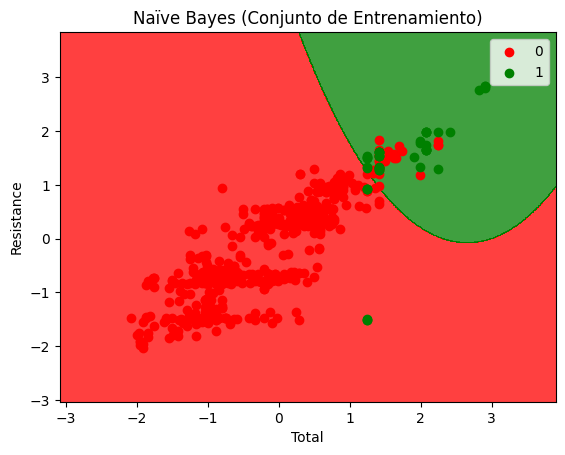

In [116]:
# Visualización del modelo de clasificación en el conjunto de Entrenamiento.

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
 np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
 alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
 plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
 color = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naïve Bayes (Conjunto de Entrenamiento)')
plt.xlabel('Total')
plt.ylabel('Resistance')
plt.legend()
plt.show()

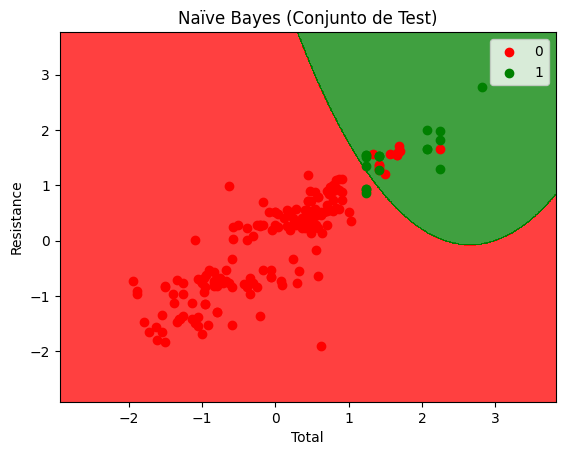

In [117]:
# Visualización del modelo de clasificación en el conjunto de Test.

X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
 np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
 alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
 plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
 color = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naïve Bayes (Conjunto de Test)')
plt.xlabel('Total')
plt.ylabel('Resistance')
plt.legend()
plt.show()

In [118]:
# Ahora analizaré diferentes métricas de evaluación del rendimiento de un modelo de clasificación.
# Precisión del modelo: La precisión mide la proporción de instancias positivas que fueron correctamente clasificadas como positivas.
# Exactitud del modelo: La exactitud es la proporción total de predicciones correctas realizadas por el modelo. 
# Sensibilidad del modelo: La sensibilidad, también conocida como tasa de verdaderos positivos o recall, mide la proporción de instancias positivas que fueron correctamente identificadas por el modelo.
# Puntaje F1 del modelo: El puntaje F1 es una medida que combina la precisión y la sensibilidad en un solo valor. Es útil cuando se busca un equilibrio entre la precisión y la sensibilidad.
# Curva ROC - AUC del modelo: La curva ROC, y el área bajo la curva (AUC) son métricas utilizadas para evaluar el rendimiento de un modelo de clasificación en problemas de clasificación binaria. La curva ROC representa la relación entre la tasa de verdaderos positivos y la tasa de falsos positivos para diferentes umbrales de clasificación. El AUC mide la capacidad del modelo para distinguir entre las clases. 

In [119]:
print(f'Precisión del modelo: {precision_score(y_test, y_pred):.2f}')
print(f'Exactitud del modelo:{accuracy_score(y_test, y_pred):.2f}')
print(f'Sensibilidad del modelo: {recall_score(y_test, y_pred):.2f}')
print(f'Puntaje F1 del modelo:{f1_score(y_test, y_pred):.2f}')
print(f'Curva ROC - AUC del modelo:{roc_auc_score(y_test, y_pred):.2f}')

Precisión del modelo: 0.52
Exactitud del modelo:0.92
Sensibilidad del modelo: 0.83
Puntaje F1 del modelo:0.64
Curva ROC - AUC del modelo:0.88


In [120]:
# Imprimoo las métricas de evaluación del modelo proporcionan información adicional sobre el rendimiento del modelo en términos de precisión, exactitud, sensibilidad, puntaje F1 y el área bajo la curva ROC-AUC.

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95       182
           1       0.52      0.83      0.64        18

    accuracy                           0.92       200
   macro avg       0.75      0.88      0.80       200
weighted avg       0.94      0.92      0.92       200



In [121]:
# Definiciones de otros datos

# Macro avg: Calcula el promedio sin tener en cuenta el desequilibrio en el número de muestras de cada clase. 
# Para cada métrica, se calcula la media de los valores para todas las clases y se informa como el promedio macro avg.
# Se trata de un promedio no ponderado en el que todas las clases tienen el mismo peso. 
# Este enfoque considera que todas las clases son igualmente importantes y le asigna la misma importancia a cada clase al calcular el promedio.

# Weighted avg: Calcula el promedio ponderado teniendo en cuenta el número de muestras en cada clase. 
# Para cada métrica, se calcula la media ponderada de los valores para todas las clases y se informa como el promedio weighted avg. 
# En este enfoque, se asigna un peso proporcional al número de muestras de cada clase. 
# Las clases con más muestras tienen un impacto mayor en el cálculo del promedio. 
# Este enfoque es útil cuando hay un desequilibrio significativo en el número de muestras entre las clases.


# Para la conclución me centraré en los valores específicos obtenidos de cada clase en lugar de los promedios macro avg y weighted avg. 
# Los valores específicos de cada clase proporcionan información más detallada y relevante sobre cómo el modelo está clasificando cada clase individualmente.
# El enfoque en los valores de cada clase es considerablemente más importante cuando hay un desequilibrio significativo en el número de muestras entre las clases. 
# En estos casos, los promedios pueden verse afectados por la clase dominante y no reflejar adecuadamente el rendimiento del modelo en las clases minoritarias.
# Por lo tanto, los valores específicos de cada clase ofrecen una visión más detallada y proporcionan mayor eficiencia en las conclusiones del rendimiento del modelo de clasificación.

In [122]:
# Conclusión

# Dado los resultados obtenidos con las diferentes metricas e informes puedo sacar las siguientes conclusiones adicionales.
# El modelo tiene una precisión muy alta para la clase 0 con un 98% lo cual es algo altamente positivo.
# Sin embargo, con respecto a la clase 1 el porcentaje de presición baja considerablemente teniendo apenas un 52% de presición.
# La exactitud o accuracy, es devolvió un porcentaje muy elevado del 92% lo que significa que un muy alto numero de instancias se clasificaron correctamente en general sobre el total de instancias.
# En general, un mayor valor de exactitud o accuracy indica un mejor rendimiento del modelo, pero tambien puede ser engañoso en casos de desequilibrio de clases, donde una clase dominante puede influir en el resultado.
# Por lo tanto es un dato que hay que tomarlo con cierto cuidado.
# Otro aspecto a tener en cuenta es que la sensibilidad con respecto a la clase 0 es del 92%, por lo que el modelo es capaz de identificar de manera confiable la mayoría de las instancias de esa clase.
# Mientras que en la clase 1, la sensibilidad apenas desciende hasta el valor de 83% lo que es un buen valor considerando los otros modelos donde en la misma clase desdendia considerablemente.
# El Puntaje F1, que es una medida que combina precisión y sensibilidad para evaluar el equilibrio entre ambas, arrojar una diferenciación marcada, 95% para la clase 0 lo cual es muy bueno, y 64% para la clase 1 siendo un porcentaje moderado.
# Finalmente el porcentaje arrojado por Curva ROC - AUC del modelo es del 88%, el cual es un valor muy por arriba del 50% (50% indica un modelo que clasifica las instancias de manera aleatoria), es un valor confiable para el rendimiento de separar las clases positivas y negativas y evitando cometer errores.

# Mi conclusión final de este modelo de clasificación Naïve Bayes, para este caso, es que posee un rendimiento moderado, algunos valores son relativamente altos lo que garantiza una buena confiabilidad para la clase 0. 
# El inconveniente se encuentra en la clase 1, ya que pese a tener una buen valor de sensibilidad, el valor de precision es algo deficiente y valor del Puntaje F1 tambien podria mejorar.
# Por esta razón, para este caso, mi conclusión es que presenta un redimiento mejor que los modelos de SVM y Regresión Logística, pero aún así está por debajo de la eficiencia de los valores obtenidos en el modelo de K-Nearest Neighbors.

In [123]:
# Clasificación con Árboles de decisión

# Es un método de aprendizaje automático supervisado que utiliza una estructura de árbol para tomar decisiones de clasificación.
# Un árbol de decisión es una estructura jerárquica compuesta por nodos de decisión y nodos de hoja. Cada nodo de decisión representa una pregunta o una prueba sobre una característica, y cada rama representa una posible respuesta o valor. Los nodos de hoja representan las clases o categorías finales a las que se clasificarán las instancias.
# Este algoritmo se basa en clasificar variables categóricas. Las predicciones se basan en combinaciones de valores en los campos de entrada.
# A través de iteraciones va realizando cortes en el conjunto de datos.
# El criterio mediante el cual se divide una rama en dos nodos hoja, es el índice de Gini. La división se hace de tal modo que se maximice el número de categorías dentro de cada una de estas divisiones que se van a realizar. La división intenta minimizar la entropía.
# Cuánto más homogéneo es el grupo, más se reduce la entropía desde el nodo padre al nodo hijo. Si la entropía en un nodo hijo llega a ser cero significa que el grupo es totalmente homogéneo y que, en consecuencia, esa rama del árbol es capaz de clasificar los usuarios, con un 100% de seguridad, en la categoría que corresponda.


In [124]:
# Importo las librerias que me brinda Python.

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score,\
 recall_score, f1_score, roc_auc_score, classification_report
import warnings


In [125]:
# Realizo la importación de los datos.
# Ignoro las advertencias generadas por el módulo warnings en Python.

warnings.filterwarnings('ignore')
df = pd.read_csv('pokemonResistance.csv', low_memory=False)
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Winbattle,Resistance
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,35,450
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,50,730
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,75,940
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,86,1110
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,40,500


In [126]:
# Para este analisis tomaré los valores de Total y Resistance para la variable X independiente.
# Y los valores de Legendary para la variable Y dependiente.

In [127]:
# Consulto si hay algún valor null (NaN), me devolverá un booleano que en caso de ser true es porque si hay valores Nan.

df.isnull().values.any()

True

In [128]:
# Averiguo en que columnas hay valores null.

df.isnull().any()

#             False
Name          False
Type 1        False
Type 2         True
Total         False
HP            False
Attack        False
Defense       False
Sp. Atk       False
Sp. Def       False
Speed         False
Generation    False
Legendary     False
Winbattle     False
Resistance    False
dtype: bool

In [129]:
# Constato que únicamente hay valores null en la columna Type2, por lo que no hay inconvenientes en tomar los datos de Total, Resistence y Legendary.

In [130]:
# Coloco los datos de las columnas Total y Resistance en la variable X.
# Coloco los datos de la columna Legendary en la variable y.

X = df.iloc[:, [4,14]].values
y = df.iloc[:, 12].values
X,y

(array([[ 318,  450],
        [ 405,  730],
        [ 525,  940],
        ...,
        [ 600, 1095],
        [ 680, 1135],
        [ 600, 1030]], dtype=int64),
 array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, Fa

In [131]:
# Utilizo LabelEnconder para convertir a números los datos categóricos de la columna Legendary almacenados en la variable y.

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y = y_encoded 
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [132]:
# Imprimo nuevamente mis variables con sus datos.

X,y

(array([[ 318,  450],
        [ 405,  730],
        [ 525,  940],
        ...,
        [ 600, 1095],
        [ 680, 1135],
        [ 600, 1030]], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 

In [133]:
# Utilizo train_test_split para dividir un dataset en bloques. 
# Conjunto de testing por un lado y conjunto de entrenamiento por el otro.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


In [134]:
# Ajusto el modelo de regresión logística con el conjunto de entrenamiento.
# Esto se hace para hacer predicciones en los datos de prueba y mostrar una tabla que compara las etiquetas reales con las etiquetas predichas para una muestra de prueba limitada.

classifier = DecisionTreeClassifier(criterion = "entropy", random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
pd.DataFrame({'Actual': y_test, 'Predicción': y_pred}).head(100)

,Actual,Predicción
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
95,0,0
96,0,0
97,1,0
98,0,0


In [135]:
# Construyo la matriz de confusión, la cual es una técnica muy potente. 
# Se calcula sobre el conjunto de testing y se puede observar si las predicciones que ha realizado el algoritmo son potentes

cm = confusion_matrix(y_test, y_pred)
cm

array([[179,   3],
       [  2,  16]], dtype=int64)

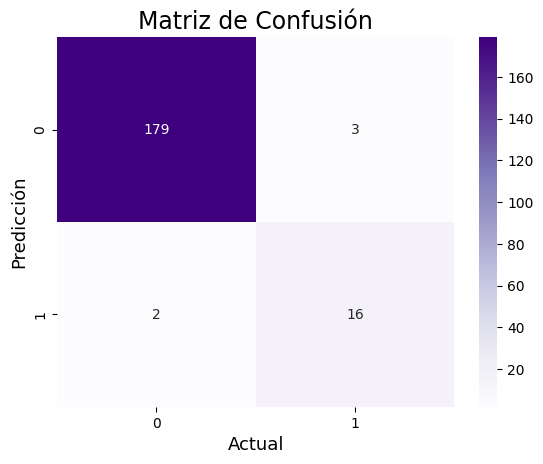

In [136]:
# Visualizo la matriz de confusión de un modelo de clasificación utilizando la biblioteca Seaborn y Matplotlib en Python.
# La matriz de confusión habla de qué tan bien ha evaluado el algoritmo la clasificación, en este caso, de los pokemones legendarios o no legendarios con respecto
# a las propiedades de Total y Resitence.

sns.heatmap(cm,
 annot=True,
 fmt='g',
 cmap='Purples')
plt.ylabel('Predicción',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Matriz de Confusión',fontsize=17)
plt.show()

In [137]:
# Las predicciones correctas son los valores numericos que se encuentran en el cuadrado superior a la izquierda junto con las que se encuentran en el cuadrado inferior a la derecha.
# Mientras que las predicciones incorrectas son los valores numericos que se encuentran en el cuadrado superior a la derecha junto con las que se encuentran en el cuadrado inferior a la izquierda.

In [138]:
# OBESERVACIÓN

# El cuadrado superior izquierdo con un valor de 179 representa la cantidad de instancias clasificadas correctamente como clase 0.
# El cuadrado superior derecho con un valor de 3 representa la cantidad de instancias clasificadas incorrectamente como clase 1 cuando en realidad son de clase 0.
# El cuadrado inferior izquierdo con un valor de 2 representa la cantidad de instancias clasificadas incorrectamente como clase 0 cuando en realidad son de clase 1.
# El cuadrado inferior derecho con un valor de 16 representa la cantidad de instancias clasificadas correctamente como clase 1.

# Noto que hay un interesante y muy alto numero de predicciones calificadas como correctas, 195 aplicando la suma de los valores correctos, a diferencia de los apenas 5 casos incorrectos.
# Además en el caso de el cuadrado superior izquierdo, clase 0, que son las predicciones correctas, presenta un color purpura intenso a diferencia de los demás. 
# Para el caso del cuadradro inferior derecho, clase 1, se nota un blanco grisaceo que lo diferencia de los blancos para las instancias clasfiicadas incorrectamente.
# Esto podriamos considerarlo como un excelente primer indicio del modelo.

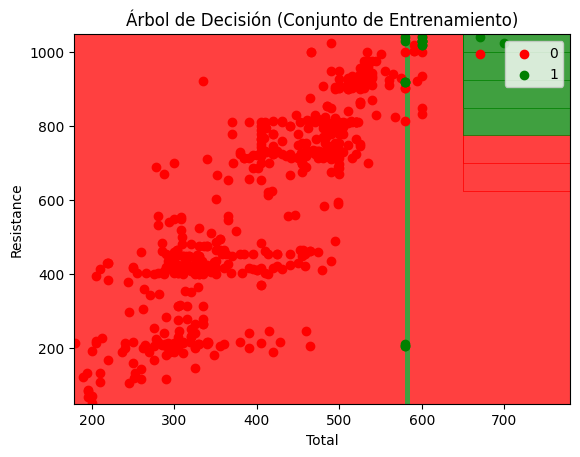

In [139]:
# Visualización del modelo de clasificación en el conjunto de Entrenamiento.

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 1),
 np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 500))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
 alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
 plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
 color = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Árbol de Decisión (Conjunto de Entrenamiento)')
plt.xlabel('Total')
plt.ylabel('Resistance')
plt.legend()
plt.show()

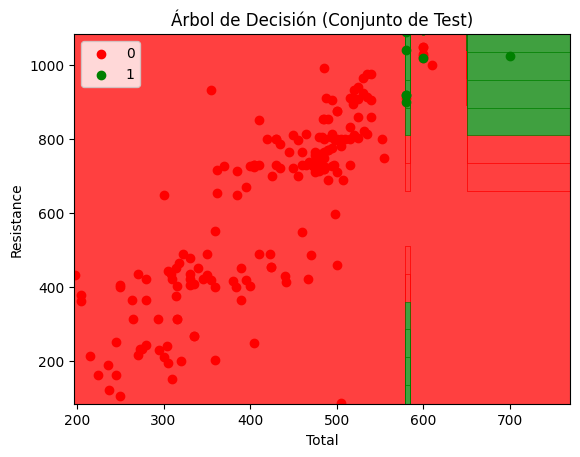

In [140]:
# Visualización del modelo de clasificación en el conjunto de Test.

X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 1),
 np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 500))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
 alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
 plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
 color = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Árbol de Decisión (Conjunto de Test)')
plt.xlabel('Total')
plt.ylabel('Resistance')
plt.legend()
plt.show()

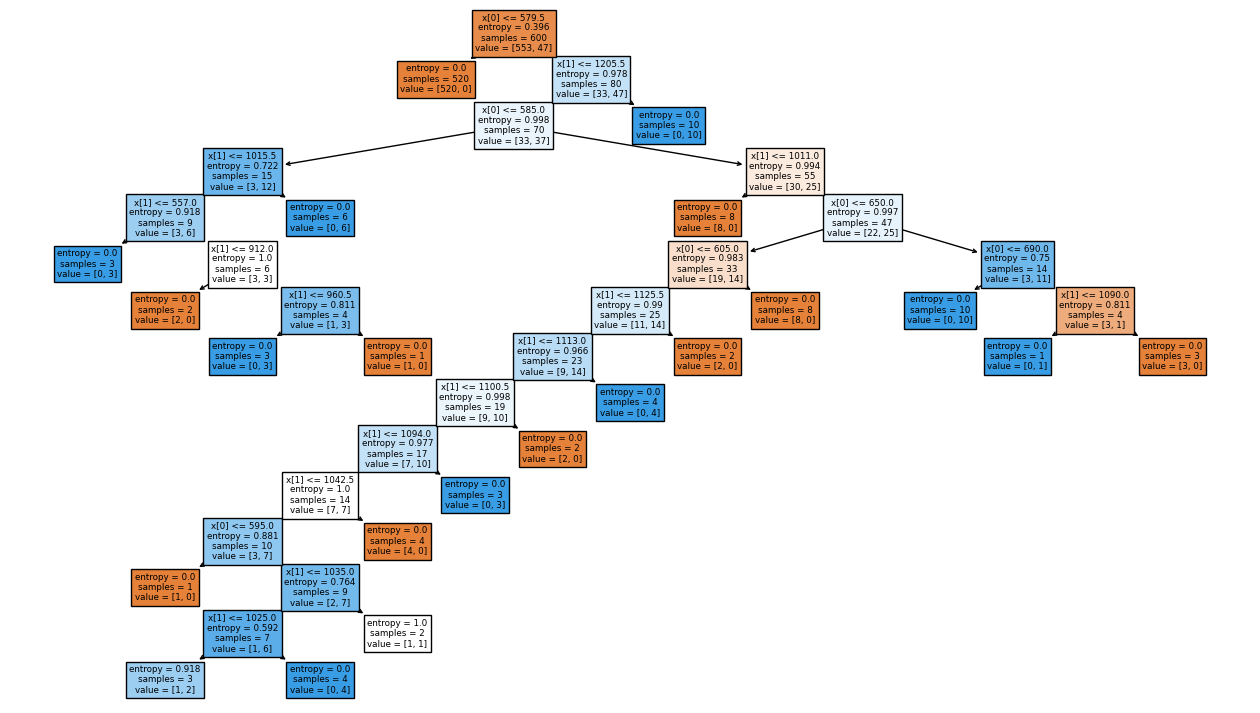

In [141]:
# Se obtuvo un límite de predicción compuesto por varias líneas horizontales y líneas verticales.

plt.figure(figsize = (16, 9))
plot_tree(classifier, filled=True)
plt.show()

In [142]:
# Determino profundidad del árbol y números de nodos terminales.

print(f"Profundidad del árbol: {classifier.get_depth()}")
print(f"Número de nodos terminales: {classifier.get_n_leaves()}")

Profundidad del árbol: 14
Número de nodos terminales: 21


In [143]:
# Ahora analizaré diferentes métricas de evaluación del rendimiento de un modelo de clasificación.
# Precisión del modelo: La precisión mide la proporción de instancias positivas que fueron correctamente clasificadas como positivas.
# Exactitud del modelo: La exactitud es la proporción total de predicciones correctas realizadas por el modelo. 
# Sensibilidad del modelo: La sensibilidad, también conocida como tasa de verdaderos positivos o recall, mide la proporción de instancias positivas que fueron correctamente identificadas por el modelo.
# Puntaje F1 del modelo: El puntaje F1 es una medida que combina la precisión y la sensibilidad en un solo valor. Es útil cuando se busca un equilibrio entre la precisión y la sensibilidad.
# Curva ROC - AUC del modelo: La curva ROC, y el área bajo la curva (AUC) son métricas utilizadas para evaluar el rendimiento de un modelo de clasificación en problemas de clasificación binaria. La curva ROC representa la relación entre la tasa de verdaderos positivos y la tasa de falsos positivos para diferentes umbrales de clasificación. El AUC mide la capacidad del modelo para distinguir entre las clases. 

In [144]:
print(f'Precisión del modelo: {precision_score(y_test, y_pred):.2f}')
print(f'Exactitud del modelo:{accuracy_score(y_test, y_pred):.2f}')
print(f'Sensibilidad del modelo: {recall_score(y_test, y_pred):.2f}')
print(f'Puntaje F1 del modelo:{f1_score(y_test, y_pred):.2f}')
print(f'Curva ROC - AUC del modelo:{roc_auc_score(y_test, y_pred):.2f}')

Precisión del modelo: 0.84
Exactitud del modelo:0.97
Sensibilidad del modelo: 0.89
Puntaje F1 del modelo:0.86
Curva ROC - AUC del modelo:0.94


In [145]:
# Imprimoo las métricas de evaluación del modelo proporcionan información adicional sobre el rendimiento del modelo en términos de precisión, exactitud, sensibilidad, puntaje F1 y el área bajo la curva ROC-AUC.

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       182
           1       0.84      0.89      0.86        18

    accuracy                           0.97       200
   macro avg       0.92      0.94      0.93       200
weighted avg       0.98      0.97      0.98       200



In [146]:
# Definiciones de otros datos

# Macro avg: Calcula el promedio sin tener en cuenta el desequilibrio en el número de muestras de cada clase. 
# Para cada métrica, se calcula la media de los valores para todas las clases y se informa como el promedio macro avg.
# Se trata de un promedio no ponderado en el que todas las clases tienen el mismo peso. 
# Este enfoque considera que todas las clases son igualmente importantes y le asigna la misma importancia a cada clase al calcular el promedio.

# Weighted avg: Calcula el promedio ponderado teniendo en cuenta el número de muestras en cada clase. 
# Para cada métrica, se calcula la media ponderada de los valores para todas las clases y se informa como el promedio weighted avg. 
# En este enfoque, se asigna un peso proporcional al número de muestras de cada clase. 
# Las clases con más muestras tienen un impacto mayor en el cálculo del promedio. 
# Este enfoque es útil cuando hay un desequilibrio significativo en el número de muestras entre las clases.


# Para la conclución me centraré en los valores específicos obtenidos de cada clase en lugar de los promedios macro avg y weighted avg. 
# Los valores específicos de cada clase proporcionan información más detallada y relevante sobre cómo el modelo está clasificando cada clase individualmente.
# El enfoque en los valores de cada clase es considerablemente más importante cuando hay un desequilibrio significativo en el número de muestras entre las clases. 
# En estos casos, los promedios pueden verse afectados por la clase dominante y no reflejar adecuadamente el rendimiento del modelo en las clases minoritarias.
# Por lo tanto, los valores específicos de cada clase ofrecen una visión más detallada y proporcionan mayor eficiencia en las conclusiones del rendimiento del modelo de clasificación.

In [147]:
# Conclusión

# Dado los resultados obtenidos con las diferentes metricas e informes puedo sacar las siguientes conclusiones adicionales.
# El modelo tiene una precisión casi perfecta para la clase 0 con un 99% lo cual es algo altamente positivo.
# Con respecto a la clase 1 el porcentaje de presición tambien es alto teniendo un valor de presición del 84%.
# La exactitud o accuracy, es devolvió un porcentaje muy elevado del 97% lo que significa que un muy alto numero de instancias se clasificaron correctamente en general sobre el total de instancias.
# En general, un mayor valor de exactitud o accuracy indica un mejor rendimiento del modelo, pero tambien puede ser engañoso en casos de desequilibrio de clases, donde una clase dominante puede influir en el resultado.
# Por lo tanto es un dato que hay que tomarlo con cierto cuidado.
# Otro aspecto a tener en cuenta es que la sensibilidad con respecto a la clase 0 es del 98%, por lo que el modelo es capaz de identificar de manera confiable la mayoría de las instancias de esa clase.
# En la clase 1, la sensibilidad es del 89%, es un numero muy alto tambien, el mas elevado hasta el momento entre todos los modelos para este aspecto.
# El Puntaje F1, que es una medida que combina precisión y sensibilidad para evaluar el equilibrio entre ambas, arroja una imperceptible diferenciación, 99% para la clase 0 lo cual es casi perfecto, y 86% para la clase 1 siendo un porcentaje muy alto.
# Finalmente el porcentaje arrojado por Curva ROC - AUC del modelo es del 94%, el cual es un valor muy por arriba del 50% (50% indica un modelo que clasifica las instancias de manera aleatoria), y podemos determinar que separa las clases positivas y negativas de manera muy buena y efectiva.

# Mi conclusión final de este modelo de clasificación de Árbol de Decisión, para este caso particular, es que posee un rendimiento excelente.
# Los valores obtenidos son muy altos para la clase 0, y en especial para la clase 1 que es donde se encontraban las mayores difucultades de los anteriores modelos para este caso.
# Es uno de los modelo con mayor confiabilidad.

In [148]:
# Impresión del accuracy test.

accuracy = accuracy_score(
 y_true = y_test,
 y_pred = classifier.predict(X = X_test),
 normalize = True
 )
print(f"El accuracy de test es: {100 * accuracy} %")


El accuracy de test es: 97.5 %


In [149]:
# Pruning (podado del árbol)

# Con el objetivo de identificar la profundidad óptima, que consigue reducir la varianza y aumentar la capacidad predictiva del modelo, se somete al árbol a un proceso de pruning por búsqueda por validación cruzada.


In [150]:
# Se utiliza el parámetro ccp_alpha: flotante no negativo, predeterminado = 0.0, es un parámetro de complejidad utilizado para la poda de costo y complejidad mínima.

param_grid = {'ccp_alpha':np.linspace(0, 5, 10)}
param_grid


{'ccp_alpha': array([0.        , 0.55555556, 1.11111111, 1.66666667, 2.22222222,
        2.77777778, 3.33333333, 3.88888889, 4.44444444, 5.        ])}

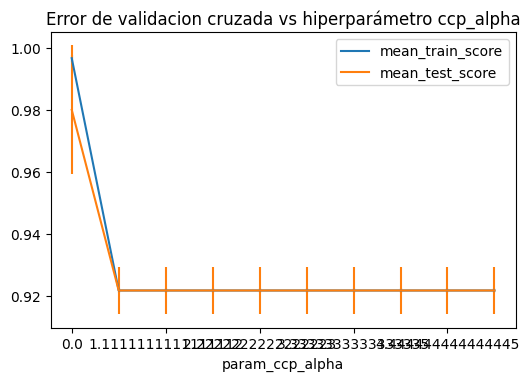

In [151]:
# Una vez identificado el valor óptimo de ccp_alpha, se reentrena el árbol indicando este valor en sus argumentos. Si en el GridSearchCV() se indica refit=True, este reentrenamiento se hace automáticamente y el modelo resultante se encuentra almacenado en .best_estimator_.
# Visualizo el Error de validacion cruzada vs hiperparámetro ccp_alpha

grid = GridSearchCV(
 estimator = DecisionTreeClassifier(random_state=123),
 param_grid = param_grid, 
 scoring = 'accuracy',
 cv = 10,
 refit = True,
 return_train_score = True
 )
grid.fit(X_train, y_train)
fig, ax = plt.subplots(figsize=(6, 3.84))
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_ccp_alpha', y='mean_train_score', yerr='std_train_score', ax=ax)
scores.plot(x='param_ccp_alpha', y='mean_test_score', yerr='std_test_score', ax=ax)
ax.set_title("Error de validacion cruzada vs hiperparámetro ccp_alpha");

In [152]:
# Mejor valor ccp_alpha encontrado

grid.best_params_

{'ccp_alpha': 0.0}

In [153]:
# Estructura del árbol final

dtc_final = grid.best_estimator_
print(f"Profundidad del árbol: {dtc_final.get_depth()}")
print(f"Número de nodos terminales: {dtc_final.get_n_leaves()}")

Profundidad del árbol: 10
Número de nodos terminales: 22


In [154]:
# Noto que hay una variación ahora en la profundidad de arbol con 10 cuando antes era de 14.
# Tambien aumento un Número de nodos terminales obteniendo 22 cuando antes era 21.

In [155]:
# Impresión del accuracy test nuevamente.

predicc = dtc_final.predict(X = X_test)
accuracy = accuracy_score(
 y_true = y_test,
 y_pred = predicc,
 normalize = True
 )
print(f"El accuracy de test es: {100 * accuracy} %")

El accuracy de test es: 97.5 %


In [156]:
# El accuracy de test no presenta variación

In [157]:
# Imprimo nuevamente las metricas de evaluación del rendimiento de un modelo de clasificación.

print(f'Precisión del modelo: {precision_score(y_test, y_pred):.2f}')
print(f'Exactitud del modelo:{accuracy_score(y_test, y_pred):.2f}')
print(f'Sensibilidad del modelo: {recall_score(y_test, y_pred):.2f}')
print(f'Puntaje F1 del modelo:{f1_score(y_test, y_pred):.2f}')
print(f'Curva ROC - AUC del modelo:{roc_auc_score(y_test, y_pred):.2f}')

Precisión del modelo: 0.84
Exactitud del modelo:0.97
Sensibilidad del modelo: 0.89
Puntaje F1 del modelo:0.86
Curva ROC - AUC del modelo:0.94


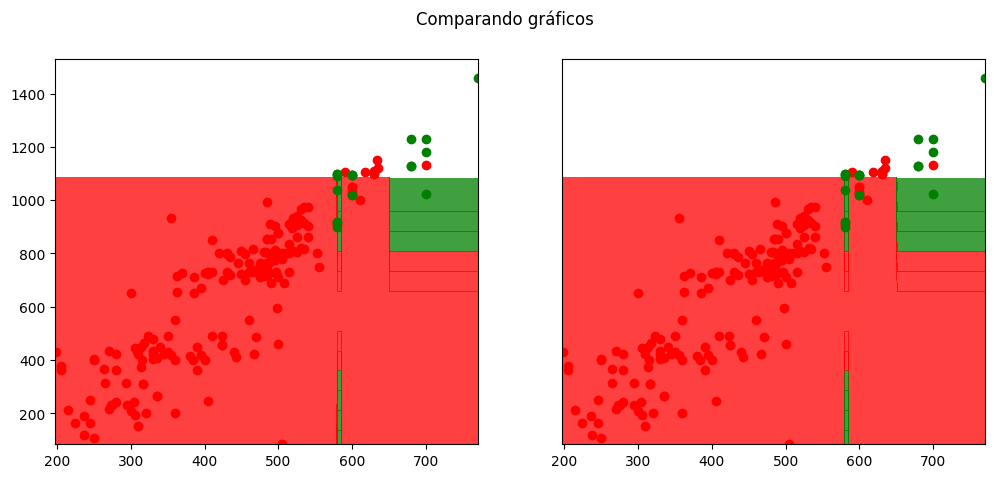

In [158]:
# Comparacion de graficos.

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 1),
 np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 500))
ax1.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
 alpha = 0.75, cmap = ListedColormap(('red', 'green')))
for i, j in enumerate(np.unique(y_set)):
 ax1.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
 color = ListedColormap(('red', 'green'))(i), label = j)
ax2.contourf(X1, X2, dtc_final.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
 alpha = 0.75, cmap = ListedColormap(('red', 'green')))
for i, j in enumerate(np.unique(y_set)):
 ax2.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
 color = ListedColormap(('red', 'green'))(i), label = j)
ax2.yaxis.set_ticks([])
fig.suptitle('Comparando gráficos')
plt.show()


In [159]:
# Una breve conclusión del metodo aplicado Pruning, podado del árbol, es que no mejoró los valores de las metricas, por lo que es un rendimiento identico.
# La comparación de los graficos muestra la misma observación.

In [160]:
# Clasificación con Random Forest

# es una extensión del algoritmo de árbol de decisión que utiliza la combinación de múltiples árboles de decisión para mejorar la precisión de la clasificación.
# se selecciona un número aleatorio de puntos que pertenecen al conjunto de entrenamiento, y con esos puntos seleccionados de entre el total, se construye un árbol de decisión de manera que se aplica la técnica Random Forest. 
# La diferencia es que, cada uno de esos árboles, elabora la predicción sobre la categoría a la cual pertenece el punto. 
# Luego se somete a voto, de modo que la categoría que obtiene más votos por parte de los árboles, es la categoría a la cual se clasifica el dato

In [161]:
# Importo las librerias que me brinda Python.

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score,\
 recall_score, f1_score, roc_auc_score, classification_report
import warnings


In [162]:
# Realizo la importación de los datos.
# Ignoro las advertencias generadas por el módulo warnings en Python.

warnings.filterwarnings("ignore")
df = pd.read_csv('pokemonResistance.csv', low_memory=False)
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Winbattle,Resistance
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,35,450
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,50,730
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,75,940
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,86,1110
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,40,500


In [163]:
# Para este analisis tomaré los valores de Total y Resistance para la variable X independiente.
# Y los valores de Legendary para la variable Y dependiente.

In [164]:
# Consulto si hay algún valor null (NaN), me devolverá un booleano que en caso de ser true es porque si hay valores Nan.

df.isnull().values.any()

True

In [165]:
# Averiguo en que columnas hay valores null.

df.isnull().any()

#             False
Name          False
Type 1        False
Type 2         True
Total         False
HP            False
Attack        False
Defense       False
Sp. Atk       False
Sp. Def       False
Speed         False
Generation    False
Legendary     False
Winbattle     False
Resistance    False
dtype: bool

In [166]:
# Constato que únicamente hay valores null en la columna Type2, por lo que no hay inconvenientes en tomar los datos de Total, Resistence y Legendary.

In [167]:
# Coloco los datos de las columnas Total y Resistance en la variable X.
# Coloco los datos de la columna Legendary en la variable y.

X = df.iloc[:, [4,14]].values
y = df.iloc[:, 12].values
X,y

(array([[ 318,  450],
        [ 405,  730],
        [ 525,  940],
        ...,
        [ 600, 1095],
        [ 680, 1135],
        [ 600, 1030]], dtype=int64),
 array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, Fa

In [168]:
# Utilizo LabelEnconder para convertir a números los datos categóricos de la columna Legendary almacenados en la variable y.

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y = y_encoded 
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [169]:
# Imprimo nuevamente mis variables con sus datos.

X,y

(array([[ 318,  450],
        [ 405,  730],
        [ 525,  940],
        ...,
        [ 600, 1095],
        [ 680, 1135],
        [ 600, 1030]], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 

In [170]:
# Utilizo train_test_split para dividir un dataset en bloques. 
# Conjunto de testing por un lado y conjunto de entrenamiento por el otro.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [171]:
# Escalo los datos (variables)
# El escalado va a transformar los valores de las características de forma que estén confinados en un rango [a, b], típicamente [0, 1] o [-1, 1].

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [172]:
# Ajusto el modelo de regresión logística con el conjunto de entrenamiento.
# Esto se hace para hacer predicciones en los datos de prueba y mostrar una tabla que compara las etiquetas reales con las etiquetas predichas para una muestra de prueba limitada.

classifier = RandomForestClassifier(n_estimators = 10, criterion = "entropy", random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
pd.DataFrame({'Actual': y_test, 'Predicción': y_pred}).head(100)

,Actual,Predicción
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
95,0,0
96,0,0
97,1,0
98,0,0


In [173]:
# Construyo la matriz de confusión, la cual es una técnica muy potente. 
# Se calcula sobre el conjunto de testing y se puede observar si las predicciones que ha realizado el algoritmo son potentes

cm = confusion_matrix(y_test, y_pred)
cm

array([[180,   2],
       [  3,  15]], dtype=int64)

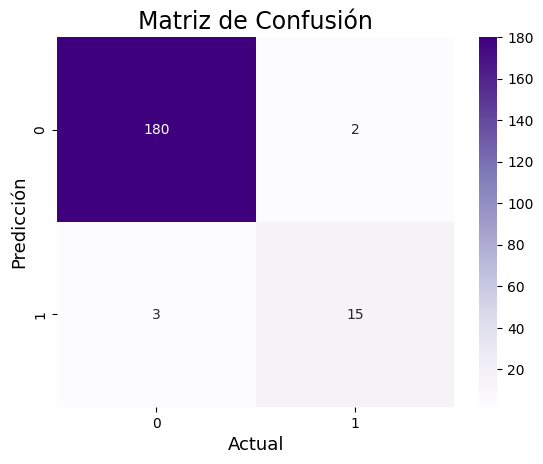

In [174]:
# Visualizo la matriz de confusión de un modelo de clasificación utilizando la biblioteca Seaborn y Matplotlib en Python.
# La matriz de confusión habla de qué tan bien ha evaluado el algoritmo la clasificación, en este caso, de los pokemones legendarios o no legendarios con respecto
# a las propiedades de Total y Resitence.

sns.heatmap(cm,
 annot=True,
 fmt='g',
 cmap='Purples')
plt.ylabel('Predicción',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Matriz de Confusión',fontsize=17)
plt.show()

In [175]:
# Las predicciones correctas son los valores numericos que se encuentran en el cuadrado superior a la izquierda junto con las que se encuentran en el cuadrado inferior a la derecha.
# Mientras que las predicciones incorrectas son los valores numericos que se encuentran en el cuadrado superior a la derecha junto con las que se encuentran en el cuadrado inferior a la izquierda.

In [176]:
# OBESERVACIÓN

# El cuadrado superior izquierdo con un valor de 180 representa la cantidad de instancias clasificadas correctamente como clase 0.
# El cuadrado superior derecho con un valor de 2 representa la cantidad de instancias clasificadas incorrectamente como clase 1 cuando en realidad son de clase 0.
# El cuadrado inferior izquierdo con un valor de 3 representa la cantidad de instancias clasificadas incorrectamente como clase 0 cuando en realidad son de clase 1.
# El cuadrado inferior derecho con un valor de 15 representa la cantidad de instancias clasificadas correctamente como clase 1.

# Noto que hay un interesante y muy alto numero de predicciones calificadas como correctas, 195 aplicando la suma de los valores correctos, a diferencia de los apenas 5 casos incorrectos.
# Además en el caso de el cuadrado superior izquierdo, clase 0, que son las predicciones correctas, presenta un color purpura intenso a diferencia de los demás. 
# Para el caso del cuadradro inferior derecho, clase 1, se nota un blanco grisaceo que lo diferencia de los blancos para las instancias clasfiicadas incorrectamente.
# Los valores arrojados son muy similiares a la matriz de confusión del modelo de Árbol de Decisión.
# Esto podriamos considerarlo como un excelente primer indicio del modelo.

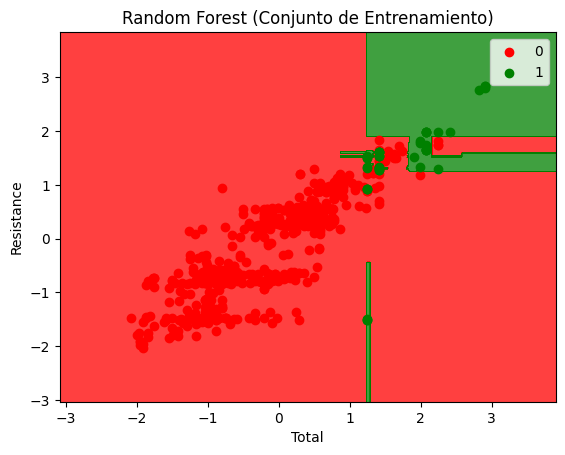

In [177]:
# Visualización del modelo de clasificación en el conjunto de Entrenamiento.

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
 np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
 alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
 plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
 color = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest (Conjunto de Entrenamiento)')
plt.xlabel('Total')
plt.ylabel('Resistance')
plt.legend()
plt.show()

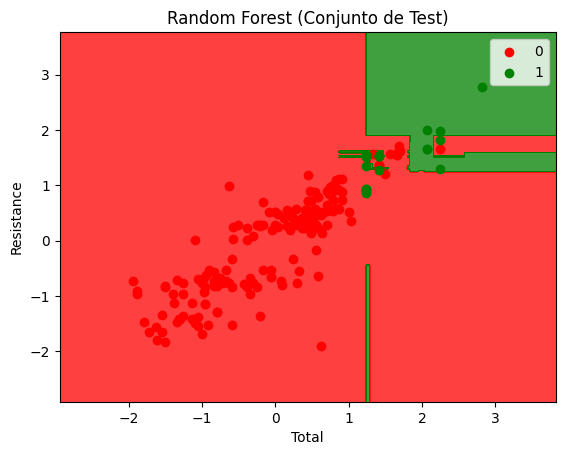

In [178]:
# Visualización del modelo de clasificación en el conjunto de Test.

X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
 np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
 alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
 plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
 color = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest (Conjunto de Test)')
plt.xlabel('Total')
plt.ylabel('Resistance')
plt.legend()
plt.show()

In [179]:
# Ahora analizaré diferentes métricas de evaluación del rendimiento de un modelo de clasificación.
# Precisión del modelo: La precisión mide la proporción de instancias positivas que fueron correctamente clasificadas como positivas.
# Exactitud del modelo: La exactitud es la proporción total de predicciones correctas realizadas por el modelo. 
# Sensibilidad del modelo: La sensibilidad, también conocida como tasa de verdaderos positivos o recall, mide la proporción de instancias positivas que fueron correctamente identificadas por el modelo.
# Puntaje F1 del modelo: El puntaje F1 es una medida que combina la precisión y la sensibilidad en un solo valor. Es útil cuando se busca un equilibrio entre la precisión y la sensibilidad.
# Curva ROC - AUC del modelo: La curva ROC, y el área bajo la curva (AUC) son métricas utilizadas para evaluar el rendimiento de un modelo de clasificación en problemas de clasificación binaria. La curva ROC representa la relación entre la tasa de verdaderos positivos y la tasa de falsos positivos para diferentes umbrales de clasificación. El AUC mide la capacidad del modelo para distinguir entre las clases. 

In [180]:
print(f'Precisión del modelo: {precision_score(y_test, y_pred):.2f}')
print(f'Exactitud del modelo:{accuracy_score(y_test, y_pred):.2f}')
print(f'Sensibilidad del modelo: {recall_score(y_test, y_pred):.2f}')
print(f'Puntaje F1 del modelo:{f1_score(y_test, y_pred):.2f}')
print(f'Curva ROC - AUC del modelo:{roc_auc_score(y_test, y_pred):.2f}')

Precisión del modelo: 0.88
Exactitud del modelo:0.97
Sensibilidad del modelo: 0.83
Puntaje F1 del modelo:0.86
Curva ROC - AUC del modelo:0.91


In [181]:
# Imprimoo las métricas de evaluación del modelo proporcionan información adicional sobre el rendimiento del modelo en términos de precisión, exactitud, sensibilidad, puntaje F1 y el área bajo la curva ROC-AUC.

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       182
           1       0.88      0.83      0.86        18

    accuracy                           0.97       200
   macro avg       0.93      0.91      0.92       200
weighted avg       0.97      0.97      0.97       200



In [182]:
# Definiciones de otros datos

# Macro avg: Calcula el promedio sin tener en cuenta el desequilibrio en el número de muestras de cada clase. 
# Para cada métrica, se calcula la media de los valores para todas las clases y se informa como el promedio macro avg.
# Se trata de un promedio no ponderado en el que todas las clases tienen el mismo peso. 
# Este enfoque considera que todas las clases son igualmente importantes y le asigna la misma importancia a cada clase al calcular el promedio.

# Weighted avg: Calcula el promedio ponderado teniendo en cuenta el número de muestras en cada clase. 
# Para cada métrica, se calcula la media ponderada de los valores para todas las clases y se informa como el promedio weighted avg. 
# En este enfoque, se asigna un peso proporcional al número de muestras de cada clase. 
# Las clases con más muestras tienen un impacto mayor en el cálculo del promedio. 
# Este enfoque es útil cuando hay un desequilibrio significativo en el número de muestras entre las clases.


# Para la conclución me centraré en los valores específicos obtenidos de cada clase en lugar de los promedios macro avg y weighted avg. 
# Los valores específicos de cada clase proporcionan información más detallada y relevante sobre cómo el modelo está clasificando cada clase individualmente.
# El enfoque en los valores de cada clase es considerablemente más importante cuando hay un desequilibrio significativo en el número de muestras entre las clases. 
# En estos casos, los promedios pueden verse afectados por la clase dominante y no reflejar adecuadamente el rendimiento del modelo en las clases minoritarias.
# Por lo tanto, los valores específicos de cada clase ofrecen una visión más detallada y proporcionan mayor eficiencia en las conclusiones del rendimiento del modelo de clasificación.

In [183]:
# Conclusión 

# Dado los resultados obtenidos con las diferentes metricas e informes puedo sacar las siguientes conclusiones adicionales.
# El modelo tiene una precisión casi perfecta para la clase 0 con un 98% lo cual es algo altamente positivo.
# Con respecto a la clase 1 el porcentaje de presición tambien es muy alto teniendo un valor de presición del 88%.
# La exactitud o accuracy, es devolvió un porcentaje muy elevado del 97% lo que significa que un muy alto numero de instancias se clasificaron correctamente en general sobre el total de instancias.
# En general, un mayor valor de exactitud o accuracy indica un mejor rendimiento del modelo, pero tambien puede ser engañoso en casos de desequilibrio de clases, donde una clase dominante puede influir en el resultado.
# Por lo tanto es un dato que hay que tomarlo con cierto cuidado.
# Otro aspecto a tener en cuenta es que la sensibilidad con respecto a la clase 0 es del 99%, por lo que el modelo es capaz de identificar de manera confiable la mayoría de las instancias de esa clase casi de manera perfecta.
# En la clase 1, la sensibilidad es del 83%, es un numero alto tambien comparandolo en general con otros modelos.
# El Puntaje F1, que es una medida que combina precisión y sensibilidad para evaluar el equilibrio entre ambas, arroja una imperceptible diferenciación, 99% para la clase 0 lo cual es casi perfecto, y 86% para la clase 1 siendo un porcentaje muy alto.
# Finalmente el porcentaje arrojado por Curva ROC - AUC del modelo es del 91%, el cual es un valor muy por arriba del 50% (50% indica un modelo que clasifica las instancias de manera aleatoria), y podemos determinar que separa las clases positivas y negativas de manera muy buena y efectiva.

# Mi conclusión final de este modelo de clasificación de Random Forest, para este caso particular, es que posee un rendimiento excelente.
# Los valores obtenidos son muy altos para la clase 0, y en especial para la clase 1 que es donde se encontraban las mayores difucultades de los anteriores modelos para este caso.
# Es uno de los modelo con mayor confiabilidad.

In [184]:
# Conclusión General

# Ya habiendo analizado este caso con diferentes algoritmos puedo sacar una conclusión final en caunto a eficiencia y rendimiento. 
# Analizando Total y Resistance con respecto a los valores de Legendary para la variable Y dependiente en estos modelo de calificación puedo concluir 
# que hay dos modelos que sobresalen de los demás dados sus valores de rendimiento devueltos en las métricas de evaluación.
# Estos son los modelos de Árbol de Decisión y Random Forest, ya que presentan una alta confiabilidad tanto para la clase 0 como para la clase 1. 
# Cualquiera de los dos arroja resultados sobresalientes, teniendo valores de presición, sensibilidad, puntaje F1 y Curva ROC - AUC muy similares. 
# Además destacar que el modelo Árbol de Decisión tiene como positivo la Interpretabilidad, sin necesidad de escalado de características, y funciona en problemas lineales y no lineales.
# El modelo Random Forest es potente y preciso, de excelente rendimiento en muchos problemas, incluidos los no lineales.
# Hay otro modelo que presentó resultados relativamente aceptables y buenos para este caso como el modelo K-Nearest Neighbors, al cual ubicaria en tercer lugar.
# Los demás modelos analizados presentan serias inconsistencias, particularmente en los valores obtenidos para la clase 1, por lo que no los vuelve modelos confiables para este caso particular.